In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , roc_auc_score 
from sklearn import metrics

In [38]:
diamonds = pd.read_csv('datasets/diamonds.csv' , index_col = 0)

In [39]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [40]:
clarity = pd.get_dummies(diamonds['clarity'])
color = pd.get_dummies(diamonds['color'])

In [41]:
diamonds = pd.concat([diamonds , clarity , color] , axis = 1)

In [42]:
diamonds.drop(['color' , 'clarity'] , axis = 1 , inplace=True)

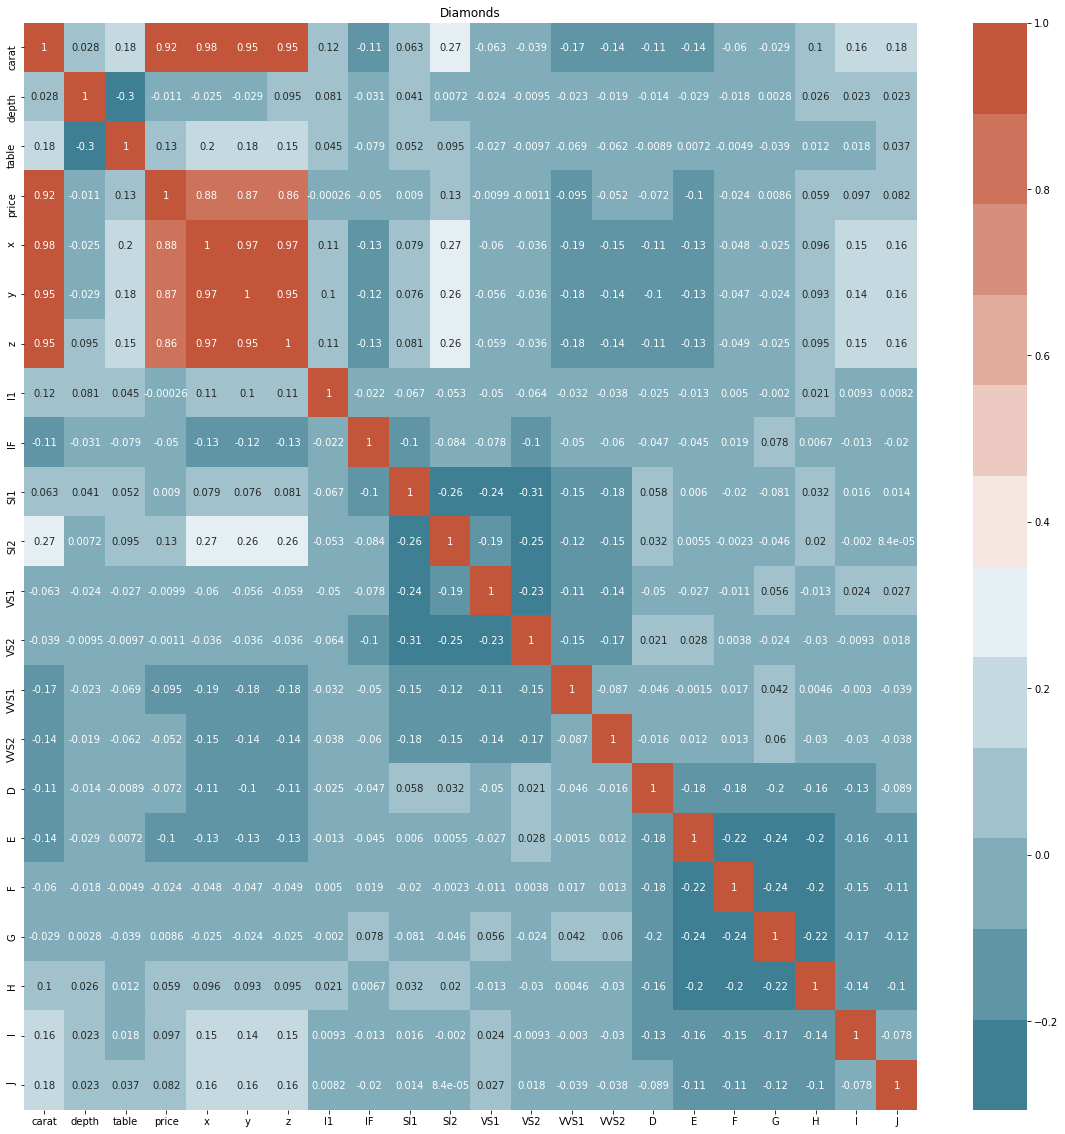

In [43]:
plt.figure(figsize=(20, 20))
df_corr = diamonds.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Diamonds")
plt.show()

In [44]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [45]:
for i in range(len(diamonds)):
    if diamonds['cut'].iloc[i] == 'Ideal':
        diamonds['cut'].iloc[i] = 1
    if diamonds['cut'].iloc[i] == 'Premium':
        diamonds['cut'].iloc[i] = 2
    if diamonds['cut'].iloc[i] == 'Very Good':
        diamonds['cut'].iloc[i] = 3
    if diamonds['cut'].iloc[i] == 'Good':
        diamonds['cut'].iloc[i] = 4
    if diamonds['cut'].iloc[i] == 'Fair':
        diamonds['cut'].iloc[i] = 5
    print('iloc number {}'.format(i))

iloc number 0
iloc number 1
iloc number 2
iloc number 3
iloc number 4
iloc number 5
iloc number 6
iloc number 7
iloc number 8
iloc number 9
iloc number 10
iloc number 11
iloc number 12
iloc number 13
iloc number 14
iloc number 15
iloc number 16
iloc number 17
iloc number 18
iloc number 19
iloc number 20
iloc number 21
iloc number 22
iloc number 23
iloc number 24
iloc number 25
iloc number 26
iloc number 27
iloc number 28
iloc number 29
iloc number 30
iloc number 31
iloc number 32
iloc number 33
iloc number 34
iloc number 35
iloc number 36
iloc number 37
iloc number 38
iloc number 39
iloc number 40
iloc number 41
iloc number 42
iloc number 43
iloc number 44
iloc number 45
iloc number 46
iloc number 47
iloc number 48
iloc number 49
iloc number 50
iloc number 51
iloc number 52
iloc number 53
iloc number 54
iloc number 55
iloc number 56
iloc number 57
iloc number 58
iloc number 59
iloc number 60
iloc number 61
iloc number 62
iloc number 63
iloc number 64
iloc number 65
iloc number 66
iloc 

iloc number 1068
iloc number 1069
iloc number 1070
iloc number 1071
iloc number 1072
iloc number 1073
iloc number 1074
iloc number 1075
iloc number 1076
iloc number 1077
iloc number 1078
iloc number 1079
iloc number 1080
iloc number 1081
iloc number 1082
iloc number 1083
iloc number 1084
iloc number 1085
iloc number 1086
iloc number 1087
iloc number 1088
iloc number 1089
iloc number 1090
iloc number 1091
iloc number 1092
iloc number 1093
iloc number 1094
iloc number 1095
iloc number 1096
iloc number 1097
iloc number 1098
iloc number 1099
iloc number 1100
iloc number 1101
iloc number 1102
iloc number 1103
iloc number 1104
iloc number 1105
iloc number 1106
iloc number 1107
iloc number 1108
iloc number 1109
iloc number 1110
iloc number 1111
iloc number 1112
iloc number 1113
iloc number 1114
iloc number 1115
iloc number 1116
iloc number 1117
iloc number 1118
iloc number 1119
iloc number 1120
iloc number 1121
iloc number 1122
iloc number 1123
iloc number 1124
iloc number 1125
iloc number 11

iloc number 1585
iloc number 1586
iloc number 1587
iloc number 1588
iloc number 1589
iloc number 1590
iloc number 1591
iloc number 1592
iloc number 1593
iloc number 1594
iloc number 1595
iloc number 1596
iloc number 1597
iloc number 1598
iloc number 1599
iloc number 1600
iloc number 1601
iloc number 1602
iloc number 1603
iloc number 1604
iloc number 1605
iloc number 1606
iloc number 1607
iloc number 1608
iloc number 1609
iloc number 1610
iloc number 1611
iloc number 1612
iloc number 1613
iloc number 1614
iloc number 1615
iloc number 1616
iloc number 1617
iloc number 1618
iloc number 1619
iloc number 1620
iloc number 1621
iloc number 1622
iloc number 1623
iloc number 1624
iloc number 1625
iloc number 1626
iloc number 1627
iloc number 1628
iloc number 1629
iloc number 1630
iloc number 1631
iloc number 1632
iloc number 1633
iloc number 1634
iloc number 1635
iloc number 1636
iloc number 1637
iloc number 1638
iloc number 1639
iloc number 1640
iloc number 1641
iloc number 1642
iloc number 16

iloc number 2072
iloc number 2073
iloc number 2074
iloc number 2075
iloc number 2076
iloc number 2077
iloc number 2078
iloc number 2079
iloc number 2080
iloc number 2081
iloc number 2082
iloc number 2083
iloc number 2084
iloc number 2085
iloc number 2086
iloc number 2087
iloc number 2088
iloc number 2089
iloc number 2090
iloc number 2091
iloc number 2092
iloc number 2093
iloc number 2094
iloc number 2095
iloc number 2096
iloc number 2097
iloc number 2098
iloc number 2099
iloc number 2100
iloc number 2101
iloc number 2102
iloc number 2103
iloc number 2104
iloc number 2105
iloc number 2106
iloc number 2107
iloc number 2108
iloc number 2109
iloc number 2110
iloc number 2111
iloc number 2112
iloc number 2113
iloc number 2114
iloc number 2115
iloc number 2116
iloc number 2117
iloc number 2118
iloc number 2119
iloc number 2120
iloc number 2121
iloc number 2122
iloc number 2123
iloc number 2124
iloc number 2125
iloc number 2126
iloc number 2127
iloc number 2128
iloc number 2129
iloc number 21

iloc number 2557
iloc number 2558
iloc number 2559
iloc number 2560
iloc number 2561
iloc number 2562
iloc number 2563
iloc number 2564
iloc number 2565
iloc number 2566
iloc number 2567
iloc number 2568
iloc number 2569
iloc number 2570
iloc number 2571
iloc number 2572
iloc number 2573
iloc number 2574
iloc number 2575
iloc number 2576
iloc number 2577
iloc number 2578
iloc number 2579
iloc number 2580
iloc number 2581
iloc number 2582
iloc number 2583
iloc number 2584
iloc number 2585
iloc number 2586
iloc number 2587
iloc number 2588
iloc number 2589
iloc number 2590
iloc number 2591
iloc number 2592
iloc number 2593
iloc number 2594
iloc number 2595
iloc number 2596
iloc number 2597
iloc number 2598
iloc number 2599
iloc number 2600
iloc number 2601
iloc number 2602
iloc number 2603
iloc number 2604
iloc number 2605
iloc number 2606
iloc number 2607
iloc number 2608
iloc number 2609
iloc number 2610
iloc number 2611
iloc number 2612
iloc number 2613
iloc number 2614
iloc number 26

iloc number 3049
iloc number 3050
iloc number 3051
iloc number 3052
iloc number 3053
iloc number 3054
iloc number 3055
iloc number 3056
iloc number 3057
iloc number 3058
iloc number 3059
iloc number 3060
iloc number 3061
iloc number 3062
iloc number 3063
iloc number 3064
iloc number 3065
iloc number 3066
iloc number 3067
iloc number 3068
iloc number 3069
iloc number 3070
iloc number 3071
iloc number 3072
iloc number 3073
iloc number 3074
iloc number 3075
iloc number 3076
iloc number 3077
iloc number 3078
iloc number 3079
iloc number 3080
iloc number 3081
iloc number 3082
iloc number 3083
iloc number 3084
iloc number 3085
iloc number 3086
iloc number 3087
iloc number 3088
iloc number 3089
iloc number 3090
iloc number 3091
iloc number 3092
iloc number 3093
iloc number 3094
iloc number 3095
iloc number 3096
iloc number 3097
iloc number 3098
iloc number 3099
iloc number 3100
iloc number 3101
iloc number 3102
iloc number 3103
iloc number 3104
iloc number 3105
iloc number 3106
iloc number 31

iloc number 3542
iloc number 3543
iloc number 3544
iloc number 3545
iloc number 3546
iloc number 3547
iloc number 3548
iloc number 3549
iloc number 3550
iloc number 3551
iloc number 3552
iloc number 3553
iloc number 3554
iloc number 3555
iloc number 3556
iloc number 3557
iloc number 3558
iloc number 3559
iloc number 3560
iloc number 3561
iloc number 3562
iloc number 3563
iloc number 3564
iloc number 3565
iloc number 3566
iloc number 3567
iloc number 3568
iloc number 3569
iloc number 3570
iloc number 3571
iloc number 3572
iloc number 3573
iloc number 3574
iloc number 3575
iloc number 3576
iloc number 3577
iloc number 3578
iloc number 3579
iloc number 3580
iloc number 3581
iloc number 3582
iloc number 3583
iloc number 3584
iloc number 3585
iloc number 3586
iloc number 3587
iloc number 3588
iloc number 3589
iloc number 3590
iloc number 3591
iloc number 3592
iloc number 3593
iloc number 3594
iloc number 3595
iloc number 3596
iloc number 3597
iloc number 3598
iloc number 3599
iloc number 36

iloc number 4029
iloc number 4030
iloc number 4031
iloc number 4032
iloc number 4033
iloc number 4034
iloc number 4035
iloc number 4036
iloc number 4037
iloc number 4038
iloc number 4039
iloc number 4040
iloc number 4041
iloc number 4042
iloc number 4043
iloc number 4044
iloc number 4045
iloc number 4046
iloc number 4047
iloc number 4048
iloc number 4049
iloc number 4050
iloc number 4051
iloc number 4052
iloc number 4053
iloc number 4054
iloc number 4055
iloc number 4056
iloc number 4057
iloc number 4058
iloc number 4059
iloc number 4060
iloc number 4061
iloc number 4062
iloc number 4063
iloc number 4064
iloc number 4065
iloc number 4066
iloc number 4067
iloc number 4068
iloc number 4069
iloc number 4070
iloc number 4071
iloc number 4072
iloc number 4073
iloc number 4074
iloc number 4075
iloc number 4076
iloc number 4077
iloc number 4078
iloc number 4079
iloc number 4080
iloc number 4081
iloc number 4082
iloc number 4083
iloc number 4084
iloc number 4085
iloc number 4086
iloc number 40

iloc number 4518
iloc number 4519
iloc number 4520
iloc number 4521
iloc number 4522
iloc number 4523
iloc number 4524
iloc number 4525
iloc number 4526
iloc number 4527
iloc number 4528
iloc number 4529
iloc number 4530
iloc number 4531
iloc number 4532
iloc number 4533
iloc number 4534
iloc number 4535
iloc number 4536
iloc number 4537
iloc number 4538
iloc number 4539
iloc number 4540
iloc number 4541
iloc number 4542
iloc number 4543
iloc number 4544
iloc number 4545
iloc number 4546
iloc number 4547
iloc number 4548
iloc number 4549
iloc number 4550
iloc number 4551
iloc number 4552
iloc number 4553
iloc number 4554
iloc number 4555
iloc number 4556
iloc number 4557
iloc number 4558
iloc number 4559
iloc number 4560
iloc number 4561
iloc number 4562
iloc number 4563
iloc number 4564
iloc number 4565
iloc number 4566
iloc number 4567
iloc number 4568
iloc number 4569
iloc number 4570
iloc number 4571
iloc number 4572
iloc number 4573
iloc number 4574
iloc number 4575
iloc number 45

iloc number 5001
iloc number 5002
iloc number 5003
iloc number 5004
iloc number 5005
iloc number 5006
iloc number 5007
iloc number 5008
iloc number 5009
iloc number 5010
iloc number 5011
iloc number 5012
iloc number 5013
iloc number 5014
iloc number 5015
iloc number 5016
iloc number 5017
iloc number 5018
iloc number 5019
iloc number 5020
iloc number 5021
iloc number 5022
iloc number 5023
iloc number 5024
iloc number 5025
iloc number 5026
iloc number 5027
iloc number 5028
iloc number 5029
iloc number 5030
iloc number 5031
iloc number 5032
iloc number 5033
iloc number 5034
iloc number 5035
iloc number 5036
iloc number 5037
iloc number 5038
iloc number 5039
iloc number 5040
iloc number 5041
iloc number 5042
iloc number 5043
iloc number 5044
iloc number 5045
iloc number 5046
iloc number 5047
iloc number 5048
iloc number 5049
iloc number 5050
iloc number 5051
iloc number 5052
iloc number 5053
iloc number 5054
iloc number 5055
iloc number 5056
iloc number 5057
iloc number 5058
iloc number 50

iloc number 5483
iloc number 5484
iloc number 5485
iloc number 5486
iloc number 5487
iloc number 5488
iloc number 5489
iloc number 5490
iloc number 5491
iloc number 5492
iloc number 5493
iloc number 5494
iloc number 5495
iloc number 5496
iloc number 5497
iloc number 5498
iloc number 5499
iloc number 5500
iloc number 5501
iloc number 5502
iloc number 5503
iloc number 5504
iloc number 5505
iloc number 5506
iloc number 5507
iloc number 5508
iloc number 5509
iloc number 5510
iloc number 5511
iloc number 5512
iloc number 5513
iloc number 5514
iloc number 5515
iloc number 5516
iloc number 5517
iloc number 5518
iloc number 5519
iloc number 5520
iloc number 5521
iloc number 5522
iloc number 5523
iloc number 5524
iloc number 5525
iloc number 5526
iloc number 5527
iloc number 5528
iloc number 5529
iloc number 5530
iloc number 5531
iloc number 5532
iloc number 5533
iloc number 5534
iloc number 5535
iloc number 5536
iloc number 5537
iloc number 5538
iloc number 5539
iloc number 5540
iloc number 55

iloc number 5988
iloc number 5989
iloc number 5990
iloc number 5991
iloc number 5992
iloc number 5993
iloc number 5994
iloc number 5995
iloc number 5996
iloc number 5997
iloc number 5998
iloc number 5999
iloc number 6000
iloc number 6001
iloc number 6002
iloc number 6003
iloc number 6004
iloc number 6005
iloc number 6006
iloc number 6007
iloc number 6008
iloc number 6009
iloc number 6010
iloc number 6011
iloc number 6012
iloc number 6013
iloc number 6014
iloc number 6015
iloc number 6016
iloc number 6017
iloc number 6018
iloc number 6019
iloc number 6020
iloc number 6021
iloc number 6022
iloc number 6023
iloc number 6024
iloc number 6025
iloc number 6026
iloc number 6027
iloc number 6028
iloc number 6029
iloc number 6030
iloc number 6031
iloc number 6032
iloc number 6033
iloc number 6034
iloc number 6035
iloc number 6036
iloc number 6037
iloc number 6038
iloc number 6039
iloc number 6040
iloc number 6041
iloc number 6042
iloc number 6043
iloc number 6044
iloc number 6045
iloc number 60

iloc number 6477
iloc number 6478
iloc number 6479
iloc number 6480
iloc number 6481
iloc number 6482
iloc number 6483
iloc number 6484
iloc number 6485
iloc number 6486
iloc number 6487
iloc number 6488
iloc number 6489
iloc number 6490
iloc number 6491
iloc number 6492
iloc number 6493
iloc number 6494
iloc number 6495
iloc number 6496
iloc number 6497
iloc number 6498
iloc number 6499
iloc number 6500
iloc number 6501
iloc number 6502
iloc number 6503
iloc number 6504
iloc number 6505
iloc number 6506
iloc number 6507
iloc number 6508
iloc number 6509
iloc number 6510
iloc number 6511
iloc number 6512
iloc number 6513
iloc number 6514
iloc number 6515
iloc number 6516
iloc number 6517
iloc number 6518
iloc number 6519
iloc number 6520
iloc number 6521
iloc number 6522
iloc number 6523
iloc number 6524
iloc number 6525
iloc number 6526
iloc number 6527
iloc number 6528
iloc number 6529
iloc number 6530
iloc number 6531
iloc number 6532
iloc number 6533
iloc number 6534
iloc number 65

iloc number 7442
iloc number 7443
iloc number 7444
iloc number 7445
iloc number 7446
iloc number 7447
iloc number 7448
iloc number 7449
iloc number 7450
iloc number 7451
iloc number 7452
iloc number 7453
iloc number 7454
iloc number 7455
iloc number 7456
iloc number 7457
iloc number 7458
iloc number 7459
iloc number 7460
iloc number 7461
iloc number 7462
iloc number 7463
iloc number 7464
iloc number 7465
iloc number 7466
iloc number 7467
iloc number 7468
iloc number 7469
iloc number 7470
iloc number 7471
iloc number 7472
iloc number 7473
iloc number 7474
iloc number 7475
iloc number 7476
iloc number 7477
iloc number 7478
iloc number 7479
iloc number 7480
iloc number 7481
iloc number 7482
iloc number 7483
iloc number 7484
iloc number 7485
iloc number 7486
iloc number 7487
iloc number 7488
iloc number 7489
iloc number 7490
iloc number 7491
iloc number 7492
iloc number 7493
iloc number 7494
iloc number 7495
iloc number 7496
iloc number 7497
iloc number 7498
iloc number 7499
iloc number 75

iloc number 7977
iloc number 7978
iloc number 7979
iloc number 7980
iloc number 7981
iloc number 7982
iloc number 7983
iloc number 7984
iloc number 7985
iloc number 7986
iloc number 7987
iloc number 7988
iloc number 7989
iloc number 7990
iloc number 7991
iloc number 7992
iloc number 7993
iloc number 7994
iloc number 7995
iloc number 7996
iloc number 7997
iloc number 7998
iloc number 7999
iloc number 8000
iloc number 8001
iloc number 8002
iloc number 8003
iloc number 8004
iloc number 8005
iloc number 8006
iloc number 8007
iloc number 8008
iloc number 8009
iloc number 8010
iloc number 8011
iloc number 8012
iloc number 8013
iloc number 8014
iloc number 8015
iloc number 8016
iloc number 8017
iloc number 8018
iloc number 8019
iloc number 8020
iloc number 8021
iloc number 8022
iloc number 8023
iloc number 8024
iloc number 8025
iloc number 8026
iloc number 8027
iloc number 8028
iloc number 8029
iloc number 8030
iloc number 8031
iloc number 8032
iloc number 8033
iloc number 8034
iloc number 80

iloc number 8479
iloc number 8480
iloc number 8481
iloc number 8482
iloc number 8483
iloc number 8484
iloc number 8485
iloc number 8486
iloc number 8487
iloc number 8488
iloc number 8489
iloc number 8490
iloc number 8491
iloc number 8492
iloc number 8493
iloc number 8494
iloc number 8495
iloc number 8496
iloc number 8497
iloc number 8498
iloc number 8499
iloc number 8500
iloc number 8501
iloc number 8502
iloc number 8503
iloc number 8504
iloc number 8505
iloc number 8506
iloc number 8507
iloc number 8508
iloc number 8509
iloc number 8510
iloc number 8511
iloc number 8512
iloc number 8513
iloc number 8514
iloc number 8515
iloc number 8516
iloc number 8517
iloc number 8518
iloc number 8519
iloc number 8520
iloc number 8521
iloc number 8522
iloc number 8523
iloc number 8524
iloc number 8525
iloc number 8526
iloc number 8527
iloc number 8528
iloc number 8529
iloc number 8530
iloc number 8531
iloc number 8532
iloc number 8533
iloc number 8534
iloc number 8535
iloc number 8536
iloc number 85

iloc number 8965
iloc number 8966
iloc number 8967
iloc number 8968
iloc number 8969
iloc number 8970
iloc number 8971
iloc number 8972
iloc number 8973
iloc number 8974
iloc number 8975
iloc number 8976
iloc number 8977
iloc number 8978
iloc number 8979
iloc number 8980
iloc number 8981
iloc number 8982
iloc number 8983
iloc number 8984
iloc number 8985
iloc number 8986
iloc number 8987
iloc number 8988
iloc number 8989
iloc number 8990
iloc number 8991
iloc number 8992
iloc number 8993
iloc number 8994
iloc number 8995
iloc number 8996
iloc number 8997
iloc number 8998
iloc number 8999
iloc number 9000
iloc number 9001
iloc number 9002
iloc number 9003
iloc number 9004
iloc number 9005
iloc number 9006
iloc number 9007
iloc number 9008
iloc number 9009
iloc number 9010
iloc number 9011
iloc number 9012
iloc number 9013
iloc number 9014
iloc number 9015
iloc number 9016
iloc number 9017
iloc number 9018
iloc number 9019
iloc number 9020
iloc number 9021
iloc number 9022
iloc number 90

iloc number 9459
iloc number 9460
iloc number 9461
iloc number 9462
iloc number 9463
iloc number 9464
iloc number 9465
iloc number 9466
iloc number 9467
iloc number 9468
iloc number 9469
iloc number 9470
iloc number 9471
iloc number 9472
iloc number 9473
iloc number 9474
iloc number 9475
iloc number 9476
iloc number 9477
iloc number 9478
iloc number 9479
iloc number 9480
iloc number 9481
iloc number 9482
iloc number 9483
iloc number 9484
iloc number 9485
iloc number 9486
iloc number 9487
iloc number 9488
iloc number 9489
iloc number 9490
iloc number 9491
iloc number 9492
iloc number 9493
iloc number 9494
iloc number 9495
iloc number 9496
iloc number 9497
iloc number 9498
iloc number 9499
iloc number 9500
iloc number 9501
iloc number 9502
iloc number 9503
iloc number 9504
iloc number 9505
iloc number 9506
iloc number 9507
iloc number 9508
iloc number 9509
iloc number 9510
iloc number 9511
iloc number 9512
iloc number 9513
iloc number 9514
iloc number 9515
iloc number 9516
iloc number 95

iloc number 9975
iloc number 9976
iloc number 9977
iloc number 9978
iloc number 9979
iloc number 9980
iloc number 9981
iloc number 9982
iloc number 9983
iloc number 9984
iloc number 9985
iloc number 9986
iloc number 9987
iloc number 9988
iloc number 9989
iloc number 9990
iloc number 9991
iloc number 9992
iloc number 9993
iloc number 9994
iloc number 9995
iloc number 9996
iloc number 9997
iloc number 9998
iloc number 9999
iloc number 10000
iloc number 10001
iloc number 10002
iloc number 10003
iloc number 10004
iloc number 10005
iloc number 10006
iloc number 10007
iloc number 10008
iloc number 10009
iloc number 10010
iloc number 10011
iloc number 10012
iloc number 10013
iloc number 10014
iloc number 10015
iloc number 10016
iloc number 10017
iloc number 10018
iloc number 10019
iloc number 10020
iloc number 10021
iloc number 10022
iloc number 10023
iloc number 10024
iloc number 10025
iloc number 10026
iloc number 10027
iloc number 10028
iloc number 10029
iloc number 10030
iloc number 10031

iloc number 10435
iloc number 10436
iloc number 10437
iloc number 10438
iloc number 10439
iloc number 10440
iloc number 10441
iloc number 10442
iloc number 10443
iloc number 10444
iloc number 10445
iloc number 10446
iloc number 10447
iloc number 10448
iloc number 10449
iloc number 10450
iloc number 10451
iloc number 10452
iloc number 10453
iloc number 10454
iloc number 10455
iloc number 10456
iloc number 10457
iloc number 10458
iloc number 10459
iloc number 10460
iloc number 10461
iloc number 10462
iloc number 10463
iloc number 10464
iloc number 10465
iloc number 10466
iloc number 10467
iloc number 10468
iloc number 10469
iloc number 10470
iloc number 10471
iloc number 10472
iloc number 10473
iloc number 10474
iloc number 10475
iloc number 10476
iloc number 10477
iloc number 10478
iloc number 10479
iloc number 10480
iloc number 10481
iloc number 10482
iloc number 10483
iloc number 10484
iloc number 10485
iloc number 10486
iloc number 10487
iloc number 10488
iloc number 10489
iloc numbe

iloc number 10922
iloc number 10923
iloc number 10924
iloc number 10925
iloc number 10926
iloc number 10927
iloc number 10928
iloc number 10929
iloc number 10930
iloc number 10931
iloc number 10932
iloc number 10933
iloc number 10934
iloc number 10935
iloc number 10936
iloc number 10937
iloc number 10938
iloc number 10939
iloc number 10940
iloc number 10941
iloc number 10942
iloc number 10943
iloc number 10944
iloc number 10945
iloc number 10946
iloc number 10947
iloc number 10948
iloc number 10949
iloc number 10950
iloc number 10951
iloc number 10952
iloc number 10953
iloc number 10954
iloc number 10955
iloc number 10956
iloc number 10957
iloc number 10958
iloc number 10959
iloc number 10960
iloc number 10961
iloc number 10962
iloc number 10963
iloc number 10964
iloc number 10965
iloc number 10966
iloc number 10967
iloc number 10968
iloc number 10969
iloc number 10970
iloc number 10971
iloc number 10972
iloc number 10973
iloc number 10974
iloc number 10975
iloc number 10976
iloc numbe

iloc number 11396
iloc number 11397
iloc number 11398
iloc number 11399
iloc number 11400
iloc number 11401
iloc number 11402
iloc number 11403
iloc number 11404
iloc number 11405
iloc number 11406
iloc number 11407
iloc number 11408
iloc number 11409
iloc number 11410
iloc number 11411
iloc number 11412
iloc number 11413
iloc number 11414
iloc number 11415
iloc number 11416
iloc number 11417
iloc number 11418
iloc number 11419
iloc number 11420
iloc number 11421
iloc number 11422
iloc number 11423
iloc number 11424
iloc number 11425
iloc number 11426
iloc number 11427
iloc number 11428
iloc number 11429
iloc number 11430
iloc number 11431
iloc number 11432
iloc number 11433
iloc number 11434
iloc number 11435
iloc number 11436
iloc number 11437
iloc number 11438
iloc number 11439
iloc number 11440
iloc number 11441
iloc number 11442
iloc number 11443
iloc number 11444
iloc number 11445
iloc number 11446
iloc number 11447
iloc number 11448
iloc number 11449
iloc number 11450
iloc numbe

iloc number 11860
iloc number 11861
iloc number 11862
iloc number 11863
iloc number 11864
iloc number 11865
iloc number 11866
iloc number 11867
iloc number 11868
iloc number 11869
iloc number 11870
iloc number 11871
iloc number 11872
iloc number 11873
iloc number 11874
iloc number 11875
iloc number 11876
iloc number 11877
iloc number 11878
iloc number 11879
iloc number 11880
iloc number 11881
iloc number 11882
iloc number 11883
iloc number 11884
iloc number 11885
iloc number 11886
iloc number 11887
iloc number 11888
iloc number 11889
iloc number 11890
iloc number 11891
iloc number 11892
iloc number 11893
iloc number 11894
iloc number 11895
iloc number 11896
iloc number 11897
iloc number 11898
iloc number 11899
iloc number 11900
iloc number 11901
iloc number 11902
iloc number 11903
iloc number 11904
iloc number 11905
iloc number 11906
iloc number 11907
iloc number 11908
iloc number 11909
iloc number 11910
iloc number 11911
iloc number 11912
iloc number 11913
iloc number 11914
iloc numbe

iloc number 12334
iloc number 12335
iloc number 12336
iloc number 12337
iloc number 12338
iloc number 12339
iloc number 12340
iloc number 12341
iloc number 12342
iloc number 12343
iloc number 12344
iloc number 12345
iloc number 12346
iloc number 12347
iloc number 12348
iloc number 12349
iloc number 12350
iloc number 12351
iloc number 12352
iloc number 12353
iloc number 12354
iloc number 12355
iloc number 12356
iloc number 12357
iloc number 12358
iloc number 12359
iloc number 12360
iloc number 12361
iloc number 12362
iloc number 12363
iloc number 12364
iloc number 12365
iloc number 12366
iloc number 12367
iloc number 12368
iloc number 12369
iloc number 12370
iloc number 12371
iloc number 12372
iloc number 12373
iloc number 12374
iloc number 12375
iloc number 12376
iloc number 12377
iloc number 12378
iloc number 12379
iloc number 12380
iloc number 12381
iloc number 12382
iloc number 12383
iloc number 12384
iloc number 12385
iloc number 12386
iloc number 12387
iloc number 12388
iloc numbe

iloc number 12792
iloc number 12793
iloc number 12794
iloc number 12795
iloc number 12796
iloc number 12797
iloc number 12798
iloc number 12799
iloc number 12800
iloc number 12801
iloc number 12802
iloc number 12803
iloc number 12804
iloc number 12805
iloc number 12806
iloc number 12807
iloc number 12808
iloc number 12809
iloc number 12810
iloc number 12811
iloc number 12812
iloc number 12813
iloc number 12814
iloc number 12815
iloc number 12816
iloc number 12817
iloc number 12818
iloc number 12819
iloc number 12820
iloc number 12821
iloc number 12822
iloc number 12823
iloc number 12824
iloc number 12825
iloc number 12826
iloc number 12827
iloc number 12828
iloc number 12829
iloc number 12830
iloc number 12831
iloc number 12832
iloc number 12833
iloc number 12834
iloc number 12835
iloc number 12836
iloc number 12837
iloc number 12838
iloc number 12839
iloc number 12840
iloc number 12841
iloc number 12842
iloc number 12843
iloc number 12844
iloc number 12845
iloc number 12846
iloc numbe

iloc number 13281
iloc number 13282
iloc number 13283
iloc number 13284
iloc number 13285
iloc number 13286
iloc number 13287
iloc number 13288
iloc number 13289
iloc number 13290
iloc number 13291
iloc number 13292
iloc number 13293
iloc number 13294
iloc number 13295
iloc number 13296
iloc number 13297
iloc number 13298
iloc number 13299
iloc number 13300
iloc number 13301
iloc number 13302
iloc number 13303
iloc number 13304
iloc number 13305
iloc number 13306
iloc number 13307
iloc number 13308
iloc number 13309
iloc number 13310
iloc number 13311
iloc number 13312
iloc number 13313
iloc number 13314
iloc number 13315
iloc number 13316
iloc number 13317
iloc number 13318
iloc number 13319
iloc number 13320
iloc number 13321
iloc number 13322
iloc number 13323
iloc number 13324
iloc number 13325
iloc number 13326
iloc number 13327
iloc number 13328
iloc number 13329
iloc number 13330
iloc number 13331
iloc number 13332
iloc number 13333
iloc number 13334
iloc number 13335
iloc numbe

iloc number 13762
iloc number 13763
iloc number 13764
iloc number 13765
iloc number 13766
iloc number 13767
iloc number 13768
iloc number 13769
iloc number 13770
iloc number 13771
iloc number 13772
iloc number 13773
iloc number 13774
iloc number 13775
iloc number 13776
iloc number 13777
iloc number 13778
iloc number 13779
iloc number 13780
iloc number 13781
iloc number 13782
iloc number 13783
iloc number 13784
iloc number 13785
iloc number 13786
iloc number 13787
iloc number 13788
iloc number 13789
iloc number 13790
iloc number 13791
iloc number 13792
iloc number 13793
iloc number 13794
iloc number 13795
iloc number 13796
iloc number 13797
iloc number 13798
iloc number 13799
iloc number 13800
iloc number 13801
iloc number 13802
iloc number 13803
iloc number 13804
iloc number 13805
iloc number 13806
iloc number 13807
iloc number 13808
iloc number 13809
iloc number 13810
iloc number 13811
iloc number 13812
iloc number 13813
iloc number 13814
iloc number 13815
iloc number 13816
iloc numbe

iloc number 14219
iloc number 14220
iloc number 14221
iloc number 14222
iloc number 14223
iloc number 14224
iloc number 14225
iloc number 14226
iloc number 14227
iloc number 14228
iloc number 14229
iloc number 14230
iloc number 14231
iloc number 14232
iloc number 14233
iloc number 14234
iloc number 14235
iloc number 14236
iloc number 14237
iloc number 14238
iloc number 14239
iloc number 14240
iloc number 14241
iloc number 14242
iloc number 14243
iloc number 14244
iloc number 14245
iloc number 14246
iloc number 14247
iloc number 14248
iloc number 14249
iloc number 14250
iloc number 14251
iloc number 14252
iloc number 14253
iloc number 14254
iloc number 14255
iloc number 14256
iloc number 14257
iloc number 14258
iloc number 14259
iloc number 14260
iloc number 14261
iloc number 14262
iloc number 14263
iloc number 14264
iloc number 14265
iloc number 14266
iloc number 14267
iloc number 14268
iloc number 14269
iloc number 14270
iloc number 14271
iloc number 14272
iloc number 14273
iloc numbe

iloc number 14678
iloc number 14679
iloc number 14680
iloc number 14681
iloc number 14682
iloc number 14683
iloc number 14684
iloc number 14685
iloc number 14686
iloc number 14687
iloc number 14688
iloc number 14689
iloc number 14690
iloc number 14691
iloc number 14692
iloc number 14693
iloc number 14694
iloc number 14695
iloc number 14696
iloc number 14697
iloc number 14698
iloc number 14699
iloc number 14700
iloc number 14701
iloc number 14702
iloc number 14703
iloc number 14704
iloc number 14705
iloc number 14706
iloc number 14707
iloc number 14708
iloc number 14709
iloc number 14710
iloc number 14711
iloc number 14712
iloc number 14713
iloc number 14714
iloc number 14715
iloc number 14716
iloc number 14717
iloc number 14718
iloc number 14719
iloc number 14720
iloc number 14721
iloc number 14722
iloc number 14723
iloc number 14724
iloc number 14725
iloc number 14726
iloc number 14727
iloc number 14728
iloc number 14729
iloc number 14730
iloc number 14731
iloc number 14732
iloc numbe

iloc number 15142
iloc number 15143
iloc number 15144
iloc number 15145
iloc number 15146
iloc number 15147
iloc number 15148
iloc number 15149
iloc number 15150
iloc number 15151
iloc number 15152
iloc number 15153
iloc number 15154
iloc number 15155
iloc number 15156
iloc number 15157
iloc number 15158
iloc number 15159
iloc number 15160
iloc number 15161
iloc number 15162
iloc number 15163
iloc number 15164
iloc number 15165
iloc number 15166
iloc number 15167
iloc number 15168
iloc number 15169
iloc number 15170
iloc number 15171
iloc number 15172
iloc number 15173
iloc number 15174
iloc number 15175
iloc number 15176
iloc number 15177
iloc number 15178
iloc number 15179
iloc number 15180
iloc number 15181
iloc number 15182
iloc number 15183
iloc number 15184
iloc number 15185
iloc number 15186
iloc number 15187
iloc number 15188
iloc number 15189
iloc number 15190
iloc number 15191
iloc number 15192
iloc number 15193
iloc number 15194
iloc number 15195
iloc number 15196
iloc numbe

iloc number 15624
iloc number 15625
iloc number 15626
iloc number 15627
iloc number 15628
iloc number 15629
iloc number 15630
iloc number 15631
iloc number 15632
iloc number 15633
iloc number 15634
iloc number 15635
iloc number 15636
iloc number 15637
iloc number 15638
iloc number 15639
iloc number 15640
iloc number 15641
iloc number 15642
iloc number 15643
iloc number 15644
iloc number 15645
iloc number 15646
iloc number 15647
iloc number 15648
iloc number 15649
iloc number 15650
iloc number 15651
iloc number 15652
iloc number 15653
iloc number 15654
iloc number 15655
iloc number 15656
iloc number 15657
iloc number 15658
iloc number 15659
iloc number 15660
iloc number 15661
iloc number 15662
iloc number 15663
iloc number 15664
iloc number 15665
iloc number 15666
iloc number 15667
iloc number 15668
iloc number 15669
iloc number 15670
iloc number 15671
iloc number 15672
iloc number 15673
iloc number 15674
iloc number 15675
iloc number 15676
iloc number 15677
iloc number 15678
iloc numbe

iloc number 16096
iloc number 16097
iloc number 16098
iloc number 16099
iloc number 16100
iloc number 16101
iloc number 16102
iloc number 16103
iloc number 16104
iloc number 16105
iloc number 16106
iloc number 16107
iloc number 16108
iloc number 16109
iloc number 16110
iloc number 16111
iloc number 16112
iloc number 16113
iloc number 16114
iloc number 16115
iloc number 16116
iloc number 16117
iloc number 16118
iloc number 16119
iloc number 16120
iloc number 16121
iloc number 16122
iloc number 16123
iloc number 16124
iloc number 16125
iloc number 16126
iloc number 16127
iloc number 16128
iloc number 16129
iloc number 16130
iloc number 16131
iloc number 16132
iloc number 16133
iloc number 16134
iloc number 16135
iloc number 16136
iloc number 16137
iloc number 16138
iloc number 16139
iloc number 16140
iloc number 16141
iloc number 16142
iloc number 16143
iloc number 16144
iloc number 16145
iloc number 16146
iloc number 16147
iloc number 16148
iloc number 16149
iloc number 16150
iloc numbe

iloc number 16558
iloc number 16559
iloc number 16560
iloc number 16561
iloc number 16562
iloc number 16563
iloc number 16564
iloc number 16565
iloc number 16566
iloc number 16567
iloc number 16568
iloc number 16569
iloc number 16570
iloc number 16571
iloc number 16572
iloc number 16573
iloc number 16574
iloc number 16575
iloc number 16576
iloc number 16577
iloc number 16578
iloc number 16579
iloc number 16580
iloc number 16581
iloc number 16582
iloc number 16583
iloc number 16584
iloc number 16585
iloc number 16586
iloc number 16587
iloc number 16588
iloc number 16589
iloc number 16590
iloc number 16591
iloc number 16592
iloc number 16593
iloc number 16594
iloc number 16595
iloc number 16596
iloc number 16597
iloc number 16598
iloc number 16599
iloc number 16600
iloc number 16601
iloc number 16602
iloc number 16603
iloc number 16604
iloc number 16605
iloc number 16606
iloc number 16607
iloc number 16608
iloc number 16609
iloc number 16610
iloc number 16611
iloc number 16612
iloc numbe

iloc number 17017
iloc number 17018
iloc number 17019
iloc number 17020
iloc number 17021
iloc number 17022
iloc number 17023
iloc number 17024
iloc number 17025
iloc number 17026
iloc number 17027
iloc number 17028
iloc number 17029
iloc number 17030
iloc number 17031
iloc number 17032
iloc number 17033
iloc number 17034
iloc number 17035
iloc number 17036
iloc number 17037
iloc number 17038
iloc number 17039
iloc number 17040
iloc number 17041
iloc number 17042
iloc number 17043
iloc number 17044
iloc number 17045
iloc number 17046
iloc number 17047
iloc number 17048
iloc number 17049
iloc number 17050
iloc number 17051
iloc number 17052
iloc number 17053
iloc number 17054
iloc number 17055
iloc number 17056
iloc number 17057
iloc number 17058
iloc number 17059
iloc number 17060
iloc number 17061
iloc number 17062
iloc number 17063
iloc number 17064
iloc number 17065
iloc number 17066
iloc number 17067
iloc number 17068
iloc number 17069
iloc number 17070
iloc number 17071
iloc numbe

iloc number 17492
iloc number 17493
iloc number 17494
iloc number 17495
iloc number 17496
iloc number 17497
iloc number 17498
iloc number 17499
iloc number 17500
iloc number 17501
iloc number 17502
iloc number 17503
iloc number 17504
iloc number 17505
iloc number 17506
iloc number 17507
iloc number 17508
iloc number 17509
iloc number 17510
iloc number 17511
iloc number 17512
iloc number 17513
iloc number 17514
iloc number 17515
iloc number 17516
iloc number 17517
iloc number 17518
iloc number 17519
iloc number 17520
iloc number 17521
iloc number 17522
iloc number 17523
iloc number 17524
iloc number 17525
iloc number 17526
iloc number 17527
iloc number 17528
iloc number 17529
iloc number 17530
iloc number 17531
iloc number 17532
iloc number 17533
iloc number 17534
iloc number 17535
iloc number 17536
iloc number 17537
iloc number 17538
iloc number 17539
iloc number 17540
iloc number 17541
iloc number 17542
iloc number 17543
iloc number 17544
iloc number 17545
iloc number 17546
iloc numbe

iloc number 17956
iloc number 17957
iloc number 17958
iloc number 17959
iloc number 17960
iloc number 17961
iloc number 17962
iloc number 17963
iloc number 17964
iloc number 17965
iloc number 17966
iloc number 17967
iloc number 17968
iloc number 17969
iloc number 17970
iloc number 17971
iloc number 17972
iloc number 17973
iloc number 17974
iloc number 17975
iloc number 17976
iloc number 17977
iloc number 17978
iloc number 17979
iloc number 17980
iloc number 17981
iloc number 17982
iloc number 17983
iloc number 17984
iloc number 17985
iloc number 17986
iloc number 17987
iloc number 17988
iloc number 17989
iloc number 17990
iloc number 17991
iloc number 17992
iloc number 17993
iloc number 17994
iloc number 17995
iloc number 17996
iloc number 17997
iloc number 17998
iloc number 17999
iloc number 18000
iloc number 18001
iloc number 18002
iloc number 18003
iloc number 18004
iloc number 18005
iloc number 18006
iloc number 18007
iloc number 18008
iloc number 18009
iloc number 18010
iloc numbe

iloc number 18454
iloc number 18455
iloc number 18456
iloc number 18457
iloc number 18458
iloc number 18459
iloc number 18460
iloc number 18461
iloc number 18462
iloc number 18463
iloc number 18464
iloc number 18465
iloc number 18466
iloc number 18467
iloc number 18468
iloc number 18469
iloc number 18470
iloc number 18471
iloc number 18472
iloc number 18473
iloc number 18474
iloc number 18475
iloc number 18476
iloc number 18477
iloc number 18478
iloc number 18479
iloc number 18480
iloc number 18481
iloc number 18482
iloc number 18483
iloc number 18484
iloc number 18485
iloc number 18486
iloc number 18487
iloc number 18488
iloc number 18489
iloc number 18490
iloc number 18491
iloc number 18492
iloc number 18493
iloc number 18494
iloc number 18495
iloc number 18496
iloc number 18497
iloc number 18498
iloc number 18499
iloc number 18500
iloc number 18501
iloc number 18502
iloc number 18503
iloc number 18504
iloc number 18505
iloc number 18506
iloc number 18507
iloc number 18508
iloc numbe

iloc number 18926
iloc number 18927
iloc number 18928
iloc number 18929
iloc number 18930
iloc number 18931
iloc number 18932
iloc number 18933
iloc number 18934
iloc number 18935
iloc number 18936
iloc number 18937
iloc number 18938
iloc number 18939
iloc number 18940
iloc number 18941
iloc number 18942
iloc number 18943
iloc number 18944
iloc number 18945
iloc number 18946
iloc number 18947
iloc number 18948
iloc number 18949
iloc number 18950
iloc number 18951
iloc number 18952
iloc number 18953
iloc number 18954
iloc number 18955
iloc number 18956
iloc number 18957
iloc number 18958
iloc number 18959
iloc number 18960
iloc number 18961
iloc number 18962
iloc number 18963
iloc number 18964
iloc number 18965
iloc number 18966
iloc number 18967
iloc number 18968
iloc number 18969
iloc number 18970
iloc number 18971
iloc number 18972
iloc number 18973
iloc number 18974
iloc number 18975
iloc number 18976
iloc number 18977
iloc number 18978
iloc number 18979
iloc number 18980
iloc numbe

iloc number 19386
iloc number 19387
iloc number 19388
iloc number 19389
iloc number 19390
iloc number 19391
iloc number 19392
iloc number 19393
iloc number 19394
iloc number 19395
iloc number 19396
iloc number 19397
iloc number 19398
iloc number 19399
iloc number 19400
iloc number 19401
iloc number 19402
iloc number 19403
iloc number 19404
iloc number 19405
iloc number 19406
iloc number 19407
iloc number 19408
iloc number 19409
iloc number 19410
iloc number 19411
iloc number 19412
iloc number 19413
iloc number 19414
iloc number 19415
iloc number 19416
iloc number 19417
iloc number 19418
iloc number 19419
iloc number 19420
iloc number 19421
iloc number 19422
iloc number 19423
iloc number 19424
iloc number 19425
iloc number 19426
iloc number 19427
iloc number 19428
iloc number 19429
iloc number 19430
iloc number 19431
iloc number 19432
iloc number 19433
iloc number 19434
iloc number 19435
iloc number 19436
iloc number 19437
iloc number 19438
iloc number 19439
iloc number 19440
iloc numbe

iloc number 19879
iloc number 19880
iloc number 19881
iloc number 19882
iloc number 19883
iloc number 19884
iloc number 19885
iloc number 19886
iloc number 19887
iloc number 19888
iloc number 19889
iloc number 19890
iloc number 19891
iloc number 19892
iloc number 19893
iloc number 19894
iloc number 19895
iloc number 19896
iloc number 19897
iloc number 19898
iloc number 19899
iloc number 19900
iloc number 19901
iloc number 19902
iloc number 19903
iloc number 19904
iloc number 19905
iloc number 19906
iloc number 19907
iloc number 19908
iloc number 19909
iloc number 19910
iloc number 19911
iloc number 19912
iloc number 19913
iloc number 19914
iloc number 19915
iloc number 19916
iloc number 19917
iloc number 19918
iloc number 19919
iloc number 19920
iloc number 19921
iloc number 19922
iloc number 19923
iloc number 19924
iloc number 19925
iloc number 19926
iloc number 19927
iloc number 19928
iloc number 19929
iloc number 19930
iloc number 19931
iloc number 19932
iloc number 19933
iloc numbe

iloc number 20370
iloc number 20371
iloc number 20372
iloc number 20373
iloc number 20374
iloc number 20375
iloc number 20376
iloc number 20377
iloc number 20378
iloc number 20379
iloc number 20380
iloc number 20381
iloc number 20382
iloc number 20383
iloc number 20384
iloc number 20385
iloc number 20386
iloc number 20387
iloc number 20388
iloc number 20389
iloc number 20390
iloc number 20391
iloc number 20392
iloc number 20393
iloc number 20394
iloc number 20395
iloc number 20396
iloc number 20397
iloc number 20398
iloc number 20399
iloc number 20400
iloc number 20401
iloc number 20402
iloc number 20403
iloc number 20404
iloc number 20405
iloc number 20406
iloc number 20407
iloc number 20408
iloc number 20409
iloc number 20410
iloc number 20411
iloc number 20412
iloc number 20413
iloc number 20414
iloc number 20415
iloc number 20416
iloc number 20417
iloc number 20418
iloc number 20419
iloc number 20420
iloc number 20421
iloc number 20422
iloc number 20423
iloc number 20424
iloc numbe

iloc number 20840
iloc number 20841
iloc number 20842
iloc number 20843
iloc number 20844
iloc number 20845
iloc number 20846
iloc number 20847
iloc number 20848
iloc number 20849
iloc number 20850
iloc number 20851
iloc number 20852
iloc number 20853
iloc number 20854
iloc number 20855
iloc number 20856
iloc number 20857
iloc number 20858
iloc number 20859
iloc number 20860
iloc number 20861
iloc number 20862
iloc number 20863
iloc number 20864
iloc number 20865
iloc number 20866
iloc number 20867
iloc number 20868
iloc number 20869
iloc number 20870
iloc number 20871
iloc number 20872
iloc number 20873
iloc number 20874
iloc number 20875
iloc number 20876
iloc number 20877
iloc number 20878
iloc number 20879
iloc number 20880
iloc number 20881
iloc number 20882
iloc number 20883
iloc number 20884
iloc number 20885
iloc number 20886
iloc number 20887
iloc number 20888
iloc number 20889
iloc number 20890
iloc number 20891
iloc number 20892
iloc number 20893
iloc number 20894
iloc numbe

iloc number 21307
iloc number 21308
iloc number 21309
iloc number 21310
iloc number 21311
iloc number 21312
iloc number 21313
iloc number 21314
iloc number 21315
iloc number 21316
iloc number 21317
iloc number 21318
iloc number 21319
iloc number 21320
iloc number 21321
iloc number 21322
iloc number 21323
iloc number 21324
iloc number 21325
iloc number 21326
iloc number 21327
iloc number 21328
iloc number 21329
iloc number 21330
iloc number 21331
iloc number 21332
iloc number 21333
iloc number 21334
iloc number 21335
iloc number 21336
iloc number 21337
iloc number 21338
iloc number 21339
iloc number 21340
iloc number 21341
iloc number 21342
iloc number 21343
iloc number 21344
iloc number 21345
iloc number 21346
iloc number 21347
iloc number 21348
iloc number 21349
iloc number 21350
iloc number 21351
iloc number 21352
iloc number 21353
iloc number 21354
iloc number 21355
iloc number 21356
iloc number 21357
iloc number 21358
iloc number 21359
iloc number 21360
iloc number 21361
iloc numbe

iloc number 21771
iloc number 21772
iloc number 21773
iloc number 21774
iloc number 21775
iloc number 21776
iloc number 21777
iloc number 21778
iloc number 21779
iloc number 21780
iloc number 21781
iloc number 21782
iloc number 21783
iloc number 21784
iloc number 21785
iloc number 21786
iloc number 21787
iloc number 21788
iloc number 21789
iloc number 21790
iloc number 21791
iloc number 21792
iloc number 21793
iloc number 21794
iloc number 21795
iloc number 21796
iloc number 21797
iloc number 21798
iloc number 21799
iloc number 21800
iloc number 21801
iloc number 21802
iloc number 21803
iloc number 21804
iloc number 21805
iloc number 21806
iloc number 21807
iloc number 21808
iloc number 21809
iloc number 21810
iloc number 21811
iloc number 21812
iloc number 21813
iloc number 21814
iloc number 21815
iloc number 21816
iloc number 21817
iloc number 21818
iloc number 21819
iloc number 21820
iloc number 21821
iloc number 21822
iloc number 21823
iloc number 21824
iloc number 21825
iloc numbe

iloc number 22233
iloc number 22234
iloc number 22235
iloc number 22236
iloc number 22237
iloc number 22238
iloc number 22239
iloc number 22240
iloc number 22241
iloc number 22242
iloc number 22243
iloc number 22244
iloc number 22245
iloc number 22246
iloc number 22247
iloc number 22248
iloc number 22249
iloc number 22250
iloc number 22251
iloc number 22252
iloc number 22253
iloc number 22254
iloc number 22255
iloc number 22256
iloc number 22257
iloc number 22258
iloc number 22259
iloc number 22260
iloc number 22261
iloc number 22262
iloc number 22263
iloc number 22264
iloc number 22265
iloc number 22266
iloc number 22267
iloc number 22268
iloc number 22269
iloc number 22270
iloc number 22271
iloc number 22272
iloc number 22273
iloc number 22274
iloc number 22275
iloc number 22276
iloc number 22277
iloc number 22278
iloc number 22279
iloc number 22280
iloc number 22281
iloc number 22282
iloc number 22283
iloc number 22284
iloc number 22285
iloc number 22286
iloc number 22287
iloc numbe

iloc number 22693
iloc number 22694
iloc number 22695
iloc number 22696
iloc number 22697
iloc number 22698
iloc number 22699
iloc number 22700
iloc number 22701
iloc number 22702
iloc number 22703
iloc number 22704
iloc number 22705
iloc number 22706
iloc number 22707
iloc number 22708
iloc number 22709
iloc number 22710
iloc number 22711
iloc number 22712
iloc number 22713
iloc number 22714
iloc number 22715
iloc number 22716
iloc number 22717
iloc number 22718
iloc number 22719
iloc number 22720
iloc number 22721
iloc number 22722
iloc number 22723
iloc number 22724
iloc number 22725
iloc number 22726
iloc number 22727
iloc number 22728
iloc number 22729
iloc number 22730
iloc number 22731
iloc number 22732
iloc number 22733
iloc number 22734
iloc number 22735
iloc number 22736
iloc number 22737
iloc number 22738
iloc number 22739
iloc number 22740
iloc number 22741
iloc number 22742
iloc number 22743
iloc number 22744
iloc number 22745
iloc number 22746
iloc number 22747
iloc numbe

iloc number 23168
iloc number 23169
iloc number 23170
iloc number 23171
iloc number 23172
iloc number 23173
iloc number 23174
iloc number 23175
iloc number 23176
iloc number 23177
iloc number 23178
iloc number 23179
iloc number 23180
iloc number 23181
iloc number 23182
iloc number 23183
iloc number 23184
iloc number 23185
iloc number 23186
iloc number 23187
iloc number 23188
iloc number 23189
iloc number 23190
iloc number 23191
iloc number 23192
iloc number 23193
iloc number 23194
iloc number 23195
iloc number 23196
iloc number 23197
iloc number 23198
iloc number 23199
iloc number 23200
iloc number 23201
iloc number 23202
iloc number 23203
iloc number 23204
iloc number 23205
iloc number 23206
iloc number 23207
iloc number 23208
iloc number 23209
iloc number 23210
iloc number 23211
iloc number 23212
iloc number 23213
iloc number 23214
iloc number 23215
iloc number 23216
iloc number 23217
iloc number 23218
iloc number 23219
iloc number 23220
iloc number 23221
iloc number 23222
iloc numbe

iloc number 23663
iloc number 23664
iloc number 23665
iloc number 23666
iloc number 23667
iloc number 23668
iloc number 23669
iloc number 23670
iloc number 23671
iloc number 23672
iloc number 23673
iloc number 23674
iloc number 23675
iloc number 23676
iloc number 23677
iloc number 23678
iloc number 23679
iloc number 23680
iloc number 23681
iloc number 23682
iloc number 23683
iloc number 23684
iloc number 23685
iloc number 23686
iloc number 23687
iloc number 23688
iloc number 23689
iloc number 23690
iloc number 23691
iloc number 23692
iloc number 23693
iloc number 23694
iloc number 23695
iloc number 23696
iloc number 23697
iloc number 23698
iloc number 23699
iloc number 23700
iloc number 23701
iloc number 23702
iloc number 23703
iloc number 23704
iloc number 23705
iloc number 23706
iloc number 23707
iloc number 23708
iloc number 23709
iloc number 23710
iloc number 23711
iloc number 23712
iloc number 23713
iloc number 23714
iloc number 23715
iloc number 23716
iloc number 23717
iloc numbe

iloc number 24165
iloc number 24166
iloc number 24167
iloc number 24168
iloc number 24169
iloc number 24170
iloc number 24171
iloc number 24172
iloc number 24173
iloc number 24174
iloc number 24175
iloc number 24176
iloc number 24177
iloc number 24178
iloc number 24179
iloc number 24180
iloc number 24181
iloc number 24182
iloc number 24183
iloc number 24184
iloc number 24185
iloc number 24186
iloc number 24187
iloc number 24188
iloc number 24189
iloc number 24190
iloc number 24191
iloc number 24192
iloc number 24193
iloc number 24194
iloc number 24195
iloc number 24196
iloc number 24197
iloc number 24198
iloc number 24199
iloc number 24200
iloc number 24201
iloc number 24202
iloc number 24203
iloc number 24204
iloc number 24205
iloc number 24206
iloc number 24207
iloc number 24208
iloc number 24209
iloc number 24210
iloc number 24211
iloc number 24212
iloc number 24213
iloc number 24214
iloc number 24215
iloc number 24216
iloc number 24217
iloc number 24218
iloc number 24219
iloc numbe

iloc number 24627
iloc number 24628
iloc number 24629
iloc number 24630
iloc number 24631
iloc number 24632
iloc number 24633
iloc number 24634
iloc number 24635
iloc number 24636
iloc number 24637
iloc number 24638
iloc number 24639
iloc number 24640
iloc number 24641
iloc number 24642
iloc number 24643
iloc number 24644
iloc number 24645
iloc number 24646
iloc number 24647
iloc number 24648
iloc number 24649
iloc number 24650
iloc number 24651
iloc number 24652
iloc number 24653
iloc number 24654
iloc number 24655
iloc number 24656
iloc number 24657
iloc number 24658
iloc number 24659
iloc number 24660
iloc number 24661
iloc number 24662
iloc number 24663
iloc number 24664
iloc number 24665
iloc number 24666
iloc number 24667
iloc number 24668
iloc number 24669
iloc number 24670
iloc number 24671
iloc number 24672
iloc number 24673
iloc number 24674
iloc number 24675
iloc number 24676
iloc number 24677
iloc number 24678
iloc number 24679
iloc number 24680
iloc number 24681
iloc numbe

iloc number 25096
iloc number 25097
iloc number 25098
iloc number 25099
iloc number 25100
iloc number 25101
iloc number 25102
iloc number 25103
iloc number 25104
iloc number 25105
iloc number 25106
iloc number 25107
iloc number 25108
iloc number 25109
iloc number 25110
iloc number 25111
iloc number 25112
iloc number 25113
iloc number 25114
iloc number 25115
iloc number 25116
iloc number 25117
iloc number 25118
iloc number 25119
iloc number 25120
iloc number 25121
iloc number 25122
iloc number 25123
iloc number 25124
iloc number 25125
iloc number 25126
iloc number 25127
iloc number 25128
iloc number 25129
iloc number 25130
iloc number 25131
iloc number 25132
iloc number 25133
iloc number 25134
iloc number 25135
iloc number 25136
iloc number 25137
iloc number 25138
iloc number 25139
iloc number 25140
iloc number 25141
iloc number 25142
iloc number 25143
iloc number 25144
iloc number 25145
iloc number 25146
iloc number 25147
iloc number 25148
iloc number 25149
iloc number 25150
iloc numbe

iloc number 25581
iloc number 25582
iloc number 25583
iloc number 25584
iloc number 25585
iloc number 25586
iloc number 25587
iloc number 25588
iloc number 25589
iloc number 25590
iloc number 25591
iloc number 25592
iloc number 25593
iloc number 25594
iloc number 25595
iloc number 25596
iloc number 25597
iloc number 25598
iloc number 25599
iloc number 25600
iloc number 25601
iloc number 25602
iloc number 25603
iloc number 25604
iloc number 25605
iloc number 25606
iloc number 25607
iloc number 25608
iloc number 25609
iloc number 25610
iloc number 25611
iloc number 25612
iloc number 25613
iloc number 25614
iloc number 25615
iloc number 25616
iloc number 25617
iloc number 25618
iloc number 25619
iloc number 25620
iloc number 25621
iloc number 25622
iloc number 25623
iloc number 25624
iloc number 25625
iloc number 25626
iloc number 25627
iloc number 25628
iloc number 25629
iloc number 25630
iloc number 25631
iloc number 25632
iloc number 25633
iloc number 25634
iloc number 25635
iloc numbe

iloc number 26067
iloc number 26068
iloc number 26069
iloc number 26070
iloc number 26071
iloc number 26072
iloc number 26073
iloc number 26074
iloc number 26075
iloc number 26076
iloc number 26077
iloc number 26078
iloc number 26079
iloc number 26080
iloc number 26081
iloc number 26082
iloc number 26083
iloc number 26084
iloc number 26085
iloc number 26086
iloc number 26087
iloc number 26088
iloc number 26089
iloc number 26090
iloc number 26091
iloc number 26092
iloc number 26093
iloc number 26094
iloc number 26095
iloc number 26096
iloc number 26097
iloc number 26098
iloc number 26099
iloc number 26100
iloc number 26101
iloc number 26102
iloc number 26103
iloc number 26104
iloc number 26105
iloc number 26106
iloc number 26107
iloc number 26108
iloc number 26109
iloc number 26110
iloc number 26111
iloc number 26112
iloc number 26113
iloc number 26114
iloc number 26115
iloc number 26116
iloc number 26117
iloc number 26118
iloc number 26119
iloc number 26120
iloc number 26121
iloc numbe

iloc number 26543
iloc number 26544
iloc number 26545
iloc number 26546
iloc number 26547
iloc number 26548
iloc number 26549
iloc number 26550
iloc number 26551
iloc number 26552
iloc number 26553
iloc number 26554
iloc number 26555
iloc number 26556
iloc number 26557
iloc number 26558
iloc number 26559
iloc number 26560
iloc number 26561
iloc number 26562
iloc number 26563
iloc number 26564
iloc number 26565
iloc number 26566
iloc number 26567
iloc number 26568
iloc number 26569
iloc number 26570
iloc number 26571
iloc number 26572
iloc number 26573
iloc number 26574
iloc number 26575
iloc number 26576
iloc number 26577
iloc number 26578
iloc number 26579
iloc number 26580
iloc number 26581
iloc number 26582
iloc number 26583
iloc number 26584
iloc number 26585
iloc number 26586
iloc number 26587
iloc number 26588
iloc number 26589
iloc number 26590
iloc number 26591
iloc number 26592
iloc number 26593
iloc number 26594
iloc number 26595
iloc number 26596
iloc number 26597
iloc numbe

iloc number 27042
iloc number 27043
iloc number 27044
iloc number 27045
iloc number 27046
iloc number 27047
iloc number 27048
iloc number 27049
iloc number 27050
iloc number 27051
iloc number 27052
iloc number 27053
iloc number 27054
iloc number 27055
iloc number 27056
iloc number 27057
iloc number 27058
iloc number 27059
iloc number 27060
iloc number 27061
iloc number 27062
iloc number 27063
iloc number 27064
iloc number 27065
iloc number 27066
iloc number 27067
iloc number 27068
iloc number 27069
iloc number 27070
iloc number 27071
iloc number 27072
iloc number 27073
iloc number 27074
iloc number 27075
iloc number 27076
iloc number 27077
iloc number 27078
iloc number 27079
iloc number 27080
iloc number 27081
iloc number 27082
iloc number 27083
iloc number 27084
iloc number 27085
iloc number 27086
iloc number 27087
iloc number 27088
iloc number 27089
iloc number 27090
iloc number 27091
iloc number 27092
iloc number 27093
iloc number 27094
iloc number 27095
iloc number 27096
iloc numbe

iloc number 27531
iloc number 27532
iloc number 27533
iloc number 27534
iloc number 27535
iloc number 27536
iloc number 27537
iloc number 27538
iloc number 27539
iloc number 27540
iloc number 27541
iloc number 27542
iloc number 27543
iloc number 27544
iloc number 27545
iloc number 27546
iloc number 27547
iloc number 27548
iloc number 27549
iloc number 27550
iloc number 27551
iloc number 27552
iloc number 27553
iloc number 27554
iloc number 27555
iloc number 27556
iloc number 27557
iloc number 27558
iloc number 27559
iloc number 27560
iloc number 27561
iloc number 27562
iloc number 27563
iloc number 27564
iloc number 27565
iloc number 27566
iloc number 27567
iloc number 27568
iloc number 27569
iloc number 27570
iloc number 27571
iloc number 27572
iloc number 27573
iloc number 27574
iloc number 27575
iloc number 27576
iloc number 27577
iloc number 27578
iloc number 27579
iloc number 27580
iloc number 27581
iloc number 27582
iloc number 27583
iloc number 27584
iloc number 27585
iloc numbe

iloc number 28006
iloc number 28007
iloc number 28008
iloc number 28009
iloc number 28010
iloc number 28011
iloc number 28012
iloc number 28013
iloc number 28014
iloc number 28015
iloc number 28016
iloc number 28017
iloc number 28018
iloc number 28019
iloc number 28020
iloc number 28021
iloc number 28022
iloc number 28023
iloc number 28024
iloc number 28025
iloc number 28026
iloc number 28027
iloc number 28028
iloc number 28029
iloc number 28030
iloc number 28031
iloc number 28032
iloc number 28033
iloc number 28034
iloc number 28035
iloc number 28036
iloc number 28037
iloc number 28038
iloc number 28039
iloc number 28040
iloc number 28041
iloc number 28042
iloc number 28043
iloc number 28044
iloc number 28045
iloc number 28046
iloc number 28047
iloc number 28048
iloc number 28049
iloc number 28050
iloc number 28051
iloc number 28052
iloc number 28053
iloc number 28054
iloc number 28055
iloc number 28056
iloc number 28057
iloc number 28058
iloc number 28059
iloc number 28060
iloc numbe

iloc number 28475
iloc number 28476
iloc number 28477
iloc number 28478
iloc number 28479
iloc number 28480
iloc number 28481
iloc number 28482
iloc number 28483
iloc number 28484
iloc number 28485
iloc number 28486
iloc number 28487
iloc number 28488
iloc number 28489
iloc number 28490
iloc number 28491
iloc number 28492
iloc number 28493
iloc number 28494
iloc number 28495
iloc number 28496
iloc number 28497
iloc number 28498
iloc number 28499
iloc number 28500
iloc number 28501
iloc number 28502
iloc number 28503
iloc number 28504
iloc number 28505
iloc number 28506
iloc number 28507
iloc number 28508
iloc number 28509
iloc number 28510
iloc number 28511
iloc number 28512
iloc number 28513
iloc number 28514
iloc number 28515
iloc number 28516
iloc number 28517
iloc number 28518
iloc number 28519
iloc number 28520
iloc number 28521
iloc number 28522
iloc number 28523
iloc number 28524
iloc number 28525
iloc number 28526
iloc number 28527
iloc number 28528
iloc number 28529
iloc numbe

iloc number 28971
iloc number 28972
iloc number 28973
iloc number 28974
iloc number 28975
iloc number 28976
iloc number 28977
iloc number 28978
iloc number 28979
iloc number 28980
iloc number 28981
iloc number 28982
iloc number 28983
iloc number 28984
iloc number 28985
iloc number 28986
iloc number 28987
iloc number 28988
iloc number 28989
iloc number 28990
iloc number 28991
iloc number 28992
iloc number 28993
iloc number 28994
iloc number 28995
iloc number 28996
iloc number 28997
iloc number 28998
iloc number 28999
iloc number 29000
iloc number 29001
iloc number 29002
iloc number 29003
iloc number 29004
iloc number 29005
iloc number 29006
iloc number 29007
iloc number 29008
iloc number 29009
iloc number 29010
iloc number 29011
iloc number 29012
iloc number 29013
iloc number 29014
iloc number 29015
iloc number 29016
iloc number 29017
iloc number 29018
iloc number 29019
iloc number 29020
iloc number 29021
iloc number 29022
iloc number 29023
iloc number 29024
iloc number 29025
iloc numbe

iloc number 29427
iloc number 29428
iloc number 29429
iloc number 29430
iloc number 29431
iloc number 29432
iloc number 29433
iloc number 29434
iloc number 29435
iloc number 29436
iloc number 29437
iloc number 29438
iloc number 29439
iloc number 29440
iloc number 29441
iloc number 29442
iloc number 29443
iloc number 29444
iloc number 29445
iloc number 29446
iloc number 29447
iloc number 29448
iloc number 29449
iloc number 29450
iloc number 29451
iloc number 29452
iloc number 29453
iloc number 29454
iloc number 29455
iloc number 29456
iloc number 29457
iloc number 29458
iloc number 29459
iloc number 29460
iloc number 29461
iloc number 29462
iloc number 29463
iloc number 29464
iloc number 29465
iloc number 29466
iloc number 29467
iloc number 29468
iloc number 29469
iloc number 29470
iloc number 29471
iloc number 29472
iloc number 29473
iloc number 29474
iloc number 29475
iloc number 29476
iloc number 29477
iloc number 29478
iloc number 29479
iloc number 29480
iloc number 29481
iloc numbe

iloc number 29910
iloc number 29911
iloc number 29912
iloc number 29913
iloc number 29914
iloc number 29915
iloc number 29916
iloc number 29917
iloc number 29918
iloc number 29919
iloc number 29920
iloc number 29921
iloc number 29922
iloc number 29923
iloc number 29924
iloc number 29925
iloc number 29926
iloc number 29927
iloc number 29928
iloc number 29929
iloc number 29930
iloc number 29931
iloc number 29932
iloc number 29933
iloc number 29934
iloc number 29935
iloc number 29936
iloc number 29937
iloc number 29938
iloc number 29939
iloc number 29940
iloc number 29941
iloc number 29942
iloc number 29943
iloc number 29944
iloc number 29945
iloc number 29946
iloc number 29947
iloc number 29948
iloc number 29949
iloc number 29950
iloc number 29951
iloc number 29952
iloc number 29953
iloc number 29954
iloc number 29955
iloc number 29956
iloc number 29957
iloc number 29958
iloc number 29959
iloc number 29960
iloc number 29961
iloc number 29962
iloc number 29963
iloc number 29964
iloc numbe

iloc number 30379
iloc number 30380
iloc number 30381
iloc number 30382
iloc number 30383
iloc number 30384
iloc number 30385
iloc number 30386
iloc number 30387
iloc number 30388
iloc number 30389
iloc number 30390
iloc number 30391
iloc number 30392
iloc number 30393
iloc number 30394
iloc number 30395
iloc number 30396
iloc number 30397
iloc number 30398
iloc number 30399
iloc number 30400
iloc number 30401
iloc number 30402
iloc number 30403
iloc number 30404
iloc number 30405
iloc number 30406
iloc number 30407
iloc number 30408
iloc number 30409
iloc number 30410
iloc number 30411
iloc number 30412
iloc number 30413
iloc number 30414
iloc number 30415
iloc number 30416
iloc number 30417
iloc number 30418
iloc number 30419
iloc number 30420
iloc number 30421
iloc number 30422
iloc number 30423
iloc number 30424
iloc number 30425
iloc number 30426
iloc number 30427
iloc number 30428
iloc number 30429
iloc number 30430
iloc number 30431
iloc number 30432
iloc number 30433
iloc numbe

iloc number 30848
iloc number 30849
iloc number 30850
iloc number 30851
iloc number 30852
iloc number 30853
iloc number 30854
iloc number 30855
iloc number 30856
iloc number 30857
iloc number 30858
iloc number 30859
iloc number 30860
iloc number 30861
iloc number 30862
iloc number 30863
iloc number 30864
iloc number 30865
iloc number 30866
iloc number 30867
iloc number 30868
iloc number 30869
iloc number 30870
iloc number 30871
iloc number 30872
iloc number 30873
iloc number 30874
iloc number 30875
iloc number 30876
iloc number 30877
iloc number 30878
iloc number 30879
iloc number 30880
iloc number 30881
iloc number 30882
iloc number 30883
iloc number 30884
iloc number 30885
iloc number 30886
iloc number 30887
iloc number 30888
iloc number 30889
iloc number 30890
iloc number 30891
iloc number 30892
iloc number 30893
iloc number 30894
iloc number 30895
iloc number 30896
iloc number 30897
iloc number 30898
iloc number 30899
iloc number 30900
iloc number 30901
iloc number 30902
iloc numbe

iloc number 31355
iloc number 31356
iloc number 31357
iloc number 31358
iloc number 31359
iloc number 31360
iloc number 31361
iloc number 31362
iloc number 31363
iloc number 31364
iloc number 31365
iloc number 31366
iloc number 31367
iloc number 31368
iloc number 31369
iloc number 31370
iloc number 31371
iloc number 31372
iloc number 31373
iloc number 31374
iloc number 31375
iloc number 31376
iloc number 31377
iloc number 31378
iloc number 31379
iloc number 31380
iloc number 31381
iloc number 31382
iloc number 31383
iloc number 31384
iloc number 31385
iloc number 31386
iloc number 31387
iloc number 31388
iloc number 31389
iloc number 31390
iloc number 31391
iloc number 31392
iloc number 31393
iloc number 31394
iloc number 31395
iloc number 31396
iloc number 31397
iloc number 31398
iloc number 31399
iloc number 31400
iloc number 31401
iloc number 31402
iloc number 31403
iloc number 31404
iloc number 31405
iloc number 31406
iloc number 31407
iloc number 31408
iloc number 31409
iloc numbe

iloc number 31854
iloc number 31855
iloc number 31856
iloc number 31857
iloc number 31858
iloc number 31859
iloc number 31860
iloc number 31861
iloc number 31862
iloc number 31863
iloc number 31864
iloc number 31865
iloc number 31866
iloc number 31867
iloc number 31868
iloc number 31869
iloc number 31870
iloc number 31871
iloc number 31872
iloc number 31873
iloc number 31874
iloc number 31875
iloc number 31876
iloc number 31877
iloc number 31878
iloc number 31879
iloc number 31880
iloc number 31881
iloc number 31882
iloc number 31883
iloc number 31884
iloc number 31885
iloc number 31886
iloc number 31887
iloc number 31888
iloc number 31889
iloc number 31890
iloc number 31891
iloc number 31892
iloc number 31893
iloc number 31894
iloc number 31895
iloc number 31896
iloc number 31897
iloc number 31898
iloc number 31899
iloc number 31900
iloc number 31901
iloc number 31902
iloc number 31903
iloc number 31904
iloc number 31905
iloc number 31906
iloc number 31907
iloc number 31908
iloc numbe

iloc number 32310
iloc number 32311
iloc number 32312
iloc number 32313
iloc number 32314
iloc number 32315
iloc number 32316
iloc number 32317
iloc number 32318
iloc number 32319
iloc number 32320
iloc number 32321
iloc number 32322
iloc number 32323
iloc number 32324
iloc number 32325
iloc number 32326
iloc number 32327
iloc number 32328
iloc number 32329
iloc number 32330
iloc number 32331
iloc number 32332
iloc number 32333
iloc number 32334
iloc number 32335
iloc number 32336
iloc number 32337
iloc number 32338
iloc number 32339
iloc number 32340
iloc number 32341
iloc number 32342
iloc number 32343
iloc number 32344
iloc number 32345
iloc number 32346
iloc number 32347
iloc number 32348
iloc number 32349
iloc number 32350
iloc number 32351
iloc number 32352
iloc number 32353
iloc number 32354
iloc number 32355
iloc number 32356
iloc number 32357
iloc number 32358
iloc number 32359
iloc number 32360
iloc number 32361
iloc number 32362
iloc number 32363
iloc number 32364
iloc numbe

iloc number 32773
iloc number 32774
iloc number 32775
iloc number 32776
iloc number 32777
iloc number 32778
iloc number 32779
iloc number 32780
iloc number 32781
iloc number 32782
iloc number 32783
iloc number 32784
iloc number 32785
iloc number 32786
iloc number 32787
iloc number 32788
iloc number 32789
iloc number 32790
iloc number 32791
iloc number 32792
iloc number 32793
iloc number 32794
iloc number 32795
iloc number 32796
iloc number 32797
iloc number 32798
iloc number 32799
iloc number 32800
iloc number 32801
iloc number 32802
iloc number 32803
iloc number 32804
iloc number 32805
iloc number 32806
iloc number 32807
iloc number 32808
iloc number 32809
iloc number 32810
iloc number 32811
iloc number 32812
iloc number 32813
iloc number 32814
iloc number 32815
iloc number 32816
iloc number 32817
iloc number 32818
iloc number 32819
iloc number 32820
iloc number 32821
iloc number 32822
iloc number 32823
iloc number 32824
iloc number 32825
iloc number 32826
iloc number 32827
iloc numbe

iloc number 33242
iloc number 33243
iloc number 33244
iloc number 33245
iloc number 33246
iloc number 33247
iloc number 33248
iloc number 33249
iloc number 33250
iloc number 33251
iloc number 33252
iloc number 33253
iloc number 33254
iloc number 33255
iloc number 33256
iloc number 33257
iloc number 33258
iloc number 33259
iloc number 33260
iloc number 33261
iloc number 33262
iloc number 33263
iloc number 33264
iloc number 33265
iloc number 33266
iloc number 33267
iloc number 33268
iloc number 33269
iloc number 33270
iloc number 33271
iloc number 33272
iloc number 33273
iloc number 33274
iloc number 33275
iloc number 33276
iloc number 33277
iloc number 33278
iloc number 33279
iloc number 33280
iloc number 33281
iloc number 33282
iloc number 33283
iloc number 33284
iloc number 33285
iloc number 33286
iloc number 33287
iloc number 33288
iloc number 33289
iloc number 33290
iloc number 33291
iloc number 33292
iloc number 33293
iloc number 33294
iloc number 33295
iloc number 33296
iloc numbe

iloc number 33717
iloc number 33718
iloc number 33719
iloc number 33720
iloc number 33721
iloc number 33722
iloc number 33723
iloc number 33724
iloc number 33725
iloc number 33726
iloc number 33727
iloc number 33728
iloc number 33729
iloc number 33730
iloc number 33731
iloc number 33732
iloc number 33733
iloc number 33734
iloc number 33735
iloc number 33736
iloc number 33737
iloc number 33738
iloc number 33739
iloc number 33740
iloc number 33741
iloc number 33742
iloc number 33743
iloc number 33744
iloc number 33745
iloc number 33746
iloc number 33747
iloc number 33748
iloc number 33749
iloc number 33750
iloc number 33751
iloc number 33752
iloc number 33753
iloc number 33754
iloc number 33755
iloc number 33756
iloc number 33757
iloc number 33758
iloc number 33759
iloc number 33760
iloc number 33761
iloc number 33762
iloc number 33763
iloc number 33764
iloc number 33765
iloc number 33766
iloc number 33767
iloc number 33768
iloc number 33769
iloc number 33770
iloc number 33771
iloc numbe

iloc number 34204
iloc number 34205
iloc number 34206
iloc number 34207
iloc number 34208
iloc number 34209
iloc number 34210
iloc number 34211
iloc number 34212
iloc number 34213
iloc number 34214
iloc number 34215
iloc number 34216
iloc number 34217
iloc number 34218
iloc number 34219
iloc number 34220
iloc number 34221
iloc number 34222
iloc number 34223
iloc number 34224
iloc number 34225
iloc number 34226
iloc number 34227
iloc number 34228
iloc number 34229
iloc number 34230
iloc number 34231
iloc number 34232
iloc number 34233
iloc number 34234
iloc number 34235
iloc number 34236
iloc number 34237
iloc number 34238
iloc number 34239
iloc number 34240
iloc number 34241
iloc number 34242
iloc number 34243
iloc number 34244
iloc number 34245
iloc number 34246
iloc number 34247
iloc number 34248
iloc number 34249
iloc number 34250
iloc number 34251
iloc number 34252
iloc number 34253
iloc number 34254
iloc number 34255
iloc number 34256
iloc number 34257
iloc number 34258
iloc numbe

iloc number 34675
iloc number 34676
iloc number 34677
iloc number 34678
iloc number 34679
iloc number 34680
iloc number 34681
iloc number 34682
iloc number 34683
iloc number 34684
iloc number 34685
iloc number 34686
iloc number 34687
iloc number 34688
iloc number 34689
iloc number 34690
iloc number 34691
iloc number 34692
iloc number 34693
iloc number 34694
iloc number 34695
iloc number 34696
iloc number 34697
iloc number 34698
iloc number 34699
iloc number 34700
iloc number 34701
iloc number 34702
iloc number 34703
iloc number 34704
iloc number 34705
iloc number 34706
iloc number 34707
iloc number 34708
iloc number 34709
iloc number 34710
iloc number 34711
iloc number 34712
iloc number 34713
iloc number 34714
iloc number 34715
iloc number 34716
iloc number 34717
iloc number 34718
iloc number 34719
iloc number 34720
iloc number 34721
iloc number 34722
iloc number 34723
iloc number 34724
iloc number 34725
iloc number 34726
iloc number 34727
iloc number 34728
iloc number 34729
iloc numbe

iloc number 35149
iloc number 35150
iloc number 35151
iloc number 35152
iloc number 35153
iloc number 35154
iloc number 35155
iloc number 35156
iloc number 35157
iloc number 35158
iloc number 35159
iloc number 35160
iloc number 35161
iloc number 35162
iloc number 35163
iloc number 35164
iloc number 35165
iloc number 35166
iloc number 35167
iloc number 35168
iloc number 35169
iloc number 35170
iloc number 35171
iloc number 35172
iloc number 35173
iloc number 35174
iloc number 35175
iloc number 35176
iloc number 35177
iloc number 35178
iloc number 35179
iloc number 35180
iloc number 35181
iloc number 35182
iloc number 35183
iloc number 35184
iloc number 35185
iloc number 35186
iloc number 35187
iloc number 35188
iloc number 35189
iloc number 35190
iloc number 35191
iloc number 35192
iloc number 35193
iloc number 35194
iloc number 35195
iloc number 35196
iloc number 35197
iloc number 35198
iloc number 35199
iloc number 35200
iloc number 35201
iloc number 35202
iloc number 35203
iloc numbe

iloc number 35608
iloc number 35609
iloc number 35610
iloc number 35611
iloc number 35612
iloc number 35613
iloc number 35614
iloc number 35615
iloc number 35616
iloc number 35617
iloc number 35618
iloc number 35619
iloc number 35620
iloc number 35621
iloc number 35622
iloc number 35623
iloc number 35624
iloc number 35625
iloc number 35626
iloc number 35627
iloc number 35628
iloc number 35629
iloc number 35630
iloc number 35631
iloc number 35632
iloc number 35633
iloc number 35634
iloc number 35635
iloc number 35636
iloc number 35637
iloc number 35638
iloc number 35639
iloc number 35640
iloc number 35641
iloc number 35642
iloc number 35643
iloc number 35644
iloc number 35645
iloc number 35646
iloc number 35647
iloc number 35648
iloc number 35649
iloc number 35650
iloc number 35651
iloc number 35652
iloc number 35653
iloc number 35654
iloc number 35655
iloc number 35656
iloc number 35657
iloc number 35658
iloc number 35659
iloc number 35660
iloc number 35661
iloc number 35662
iloc numbe

iloc number 36080
iloc number 36081
iloc number 36082
iloc number 36083
iloc number 36084
iloc number 36085
iloc number 36086
iloc number 36087
iloc number 36088
iloc number 36089
iloc number 36090
iloc number 36091
iloc number 36092
iloc number 36093
iloc number 36094
iloc number 36095
iloc number 36096
iloc number 36097
iloc number 36098
iloc number 36099
iloc number 36100
iloc number 36101
iloc number 36102
iloc number 36103
iloc number 36104
iloc number 36105
iloc number 36106
iloc number 36107
iloc number 36108
iloc number 36109
iloc number 36110
iloc number 36111
iloc number 36112
iloc number 36113
iloc number 36114
iloc number 36115
iloc number 36116
iloc number 36117
iloc number 36118
iloc number 36119
iloc number 36120
iloc number 36121
iloc number 36122
iloc number 36123
iloc number 36124
iloc number 36125
iloc number 36126
iloc number 36127
iloc number 36128
iloc number 36129
iloc number 36130
iloc number 36131
iloc number 36132
iloc number 36133
iloc number 36134
iloc numbe

iloc number 36537
iloc number 36538
iloc number 36539
iloc number 36540
iloc number 36541
iloc number 36542
iloc number 36543
iloc number 36544
iloc number 36545
iloc number 36546
iloc number 36547
iloc number 36548
iloc number 36549
iloc number 36550
iloc number 36551
iloc number 36552
iloc number 36553
iloc number 36554
iloc number 36555
iloc number 36556
iloc number 36557
iloc number 36558
iloc number 36559
iloc number 36560
iloc number 36561
iloc number 36562
iloc number 36563
iloc number 36564
iloc number 36565
iloc number 36566
iloc number 36567
iloc number 36568
iloc number 36569
iloc number 36570
iloc number 36571
iloc number 36572
iloc number 36573
iloc number 36574
iloc number 36575
iloc number 36576
iloc number 36577
iloc number 36578
iloc number 36579
iloc number 36580
iloc number 36581
iloc number 36582
iloc number 36583
iloc number 36584
iloc number 36585
iloc number 36586
iloc number 36587
iloc number 36588
iloc number 36589
iloc number 36590
iloc number 36591
iloc numbe

iloc number 37022
iloc number 37023
iloc number 37024
iloc number 37025
iloc number 37026
iloc number 37027
iloc number 37028
iloc number 37029
iloc number 37030
iloc number 37031
iloc number 37032
iloc number 37033
iloc number 37034
iloc number 37035
iloc number 37036
iloc number 37037
iloc number 37038
iloc number 37039
iloc number 37040
iloc number 37041
iloc number 37042
iloc number 37043
iloc number 37044
iloc number 37045
iloc number 37046
iloc number 37047
iloc number 37048
iloc number 37049
iloc number 37050
iloc number 37051
iloc number 37052
iloc number 37053
iloc number 37054
iloc number 37055
iloc number 37056
iloc number 37057
iloc number 37058
iloc number 37059
iloc number 37060
iloc number 37061
iloc number 37062
iloc number 37063
iloc number 37064
iloc number 37065
iloc number 37066
iloc number 37067
iloc number 37068
iloc number 37069
iloc number 37070
iloc number 37071
iloc number 37072
iloc number 37073
iloc number 37074
iloc number 37075
iloc number 37076
iloc numbe

iloc number 37500
iloc number 37501
iloc number 37502
iloc number 37503
iloc number 37504
iloc number 37505
iloc number 37506
iloc number 37507
iloc number 37508
iloc number 37509
iloc number 37510
iloc number 37511
iloc number 37512
iloc number 37513
iloc number 37514
iloc number 37515
iloc number 37516
iloc number 37517
iloc number 37518
iloc number 37519
iloc number 37520
iloc number 37521
iloc number 37522
iloc number 37523
iloc number 37524
iloc number 37525
iloc number 37526
iloc number 37527
iloc number 37528
iloc number 37529
iloc number 37530
iloc number 37531
iloc number 37532
iloc number 37533
iloc number 37534
iloc number 37535
iloc number 37536
iloc number 37537
iloc number 37538
iloc number 37539
iloc number 37540
iloc number 37541
iloc number 37542
iloc number 37543
iloc number 37544
iloc number 37545
iloc number 37546
iloc number 37547
iloc number 37548
iloc number 37549
iloc number 37550
iloc number 37551
iloc number 37552
iloc number 37553
iloc number 37554
iloc numbe

iloc number 38004
iloc number 38005
iloc number 38006
iloc number 38007
iloc number 38008
iloc number 38009
iloc number 38010
iloc number 38011
iloc number 38012
iloc number 38013
iloc number 38014
iloc number 38015
iloc number 38016
iloc number 38017
iloc number 38018
iloc number 38019
iloc number 38020
iloc number 38021
iloc number 38022
iloc number 38023
iloc number 38024
iloc number 38025
iloc number 38026
iloc number 38027
iloc number 38028
iloc number 38029
iloc number 38030
iloc number 38031
iloc number 38032
iloc number 38033
iloc number 38034
iloc number 38035
iloc number 38036
iloc number 38037
iloc number 38038
iloc number 38039
iloc number 38040
iloc number 38041
iloc number 38042
iloc number 38043
iloc number 38044
iloc number 38045
iloc number 38046
iloc number 38047
iloc number 38048
iloc number 38049
iloc number 38050
iloc number 38051
iloc number 38052
iloc number 38053
iloc number 38054
iloc number 38055
iloc number 38056
iloc number 38057
iloc number 38058
iloc numbe

iloc number 38512
iloc number 38513
iloc number 38514
iloc number 38515
iloc number 38516
iloc number 38517
iloc number 38518
iloc number 38519
iloc number 38520
iloc number 38521
iloc number 38522
iloc number 38523
iloc number 38524
iloc number 38525
iloc number 38526
iloc number 38527
iloc number 38528
iloc number 38529
iloc number 38530
iloc number 38531
iloc number 38532
iloc number 38533
iloc number 38534
iloc number 38535
iloc number 38536
iloc number 38537
iloc number 38538
iloc number 38539
iloc number 38540
iloc number 38541
iloc number 38542
iloc number 38543
iloc number 38544
iloc number 38545
iloc number 38546
iloc number 38547
iloc number 38548
iloc number 38549
iloc number 38550
iloc number 38551
iloc number 38552
iloc number 38553
iloc number 38554
iloc number 38555
iloc number 38556
iloc number 38557
iloc number 38558
iloc number 38559
iloc number 38560
iloc number 38561
iloc number 38562
iloc number 38563
iloc number 38564
iloc number 38565
iloc number 38566
iloc numbe

iloc number 38995
iloc number 38996
iloc number 38997
iloc number 38998
iloc number 38999
iloc number 39000
iloc number 39001
iloc number 39002
iloc number 39003
iloc number 39004
iloc number 39005
iloc number 39006
iloc number 39007
iloc number 39008
iloc number 39009
iloc number 39010
iloc number 39011
iloc number 39012
iloc number 39013
iloc number 39014
iloc number 39015
iloc number 39016
iloc number 39017
iloc number 39018
iloc number 39019
iloc number 39020
iloc number 39021
iloc number 39022
iloc number 39023
iloc number 39024
iloc number 39025
iloc number 39026
iloc number 39027
iloc number 39028
iloc number 39029
iloc number 39030
iloc number 39031
iloc number 39032
iloc number 39033
iloc number 39034
iloc number 39035
iloc number 39036
iloc number 39037
iloc number 39038
iloc number 39039
iloc number 39040
iloc number 39041
iloc number 39042
iloc number 39043
iloc number 39044
iloc number 39045
iloc number 39046
iloc number 39047
iloc number 39048
iloc number 39049
iloc numbe

iloc number 39456
iloc number 39457
iloc number 39458
iloc number 39459
iloc number 39460
iloc number 39461
iloc number 39462
iloc number 39463
iloc number 39464
iloc number 39465
iloc number 39466
iloc number 39467
iloc number 39468
iloc number 39469
iloc number 39470
iloc number 39471
iloc number 39472
iloc number 39473
iloc number 39474
iloc number 39475
iloc number 39476
iloc number 39477
iloc number 39478
iloc number 39479
iloc number 39480
iloc number 39481
iloc number 39482
iloc number 39483
iloc number 39484
iloc number 39485
iloc number 39486
iloc number 39487
iloc number 39488
iloc number 39489
iloc number 39490
iloc number 39491
iloc number 39492
iloc number 39493
iloc number 39494
iloc number 39495
iloc number 39496
iloc number 39497
iloc number 39498
iloc number 39499
iloc number 39500
iloc number 39501
iloc number 39502
iloc number 39503
iloc number 39504
iloc number 39505
iloc number 39506
iloc number 39507
iloc number 39508
iloc number 39509
iloc number 39510
iloc numbe

iloc number 39913
iloc number 39914
iloc number 39915
iloc number 39916
iloc number 39917
iloc number 39918
iloc number 39919
iloc number 39920
iloc number 39921
iloc number 39922
iloc number 39923
iloc number 39924
iloc number 39925
iloc number 39926
iloc number 39927
iloc number 39928
iloc number 39929
iloc number 39930
iloc number 39931
iloc number 39932
iloc number 39933
iloc number 39934
iloc number 39935
iloc number 39936
iloc number 39937
iloc number 39938
iloc number 39939
iloc number 39940
iloc number 39941
iloc number 39942
iloc number 39943
iloc number 39944
iloc number 39945
iloc number 39946
iloc number 39947
iloc number 39948
iloc number 39949
iloc number 39950
iloc number 39951
iloc number 39952
iloc number 39953
iloc number 39954
iloc number 39955
iloc number 39956
iloc number 39957
iloc number 39958
iloc number 39959
iloc number 39960
iloc number 39961
iloc number 39962
iloc number 39963
iloc number 39964
iloc number 39965
iloc number 39966
iloc number 39967
iloc numbe

iloc number 40372
iloc number 40373
iloc number 40374
iloc number 40375
iloc number 40376
iloc number 40377
iloc number 40378
iloc number 40379
iloc number 40380
iloc number 40381
iloc number 40382
iloc number 40383
iloc number 40384
iloc number 40385
iloc number 40386
iloc number 40387
iloc number 40388
iloc number 40389
iloc number 40390
iloc number 40391
iloc number 40392
iloc number 40393
iloc number 40394
iloc number 40395
iloc number 40396
iloc number 40397
iloc number 40398
iloc number 40399
iloc number 40400
iloc number 40401
iloc number 40402
iloc number 40403
iloc number 40404
iloc number 40405
iloc number 40406
iloc number 40407
iloc number 40408
iloc number 40409
iloc number 40410
iloc number 40411
iloc number 40412
iloc number 40413
iloc number 40414
iloc number 40415
iloc number 40416
iloc number 40417
iloc number 40418
iloc number 40419
iloc number 40420
iloc number 40421
iloc number 40422
iloc number 40423
iloc number 40424
iloc number 40425
iloc number 40426
iloc numbe

iloc number 40833
iloc number 40834
iloc number 40835
iloc number 40836
iloc number 40837
iloc number 40838
iloc number 40839
iloc number 40840
iloc number 40841
iloc number 40842
iloc number 40843
iloc number 40844
iloc number 40845
iloc number 40846
iloc number 40847
iloc number 40848
iloc number 40849
iloc number 40850
iloc number 40851
iloc number 40852
iloc number 40853
iloc number 40854
iloc number 40855
iloc number 40856
iloc number 40857
iloc number 40858
iloc number 40859
iloc number 40860
iloc number 40861
iloc number 40862
iloc number 40863
iloc number 40864
iloc number 40865
iloc number 40866
iloc number 40867
iloc number 40868
iloc number 40869
iloc number 40870
iloc number 40871
iloc number 40872
iloc number 40873
iloc number 40874
iloc number 40875
iloc number 40876
iloc number 40877
iloc number 40878
iloc number 40879
iloc number 40880
iloc number 40881
iloc number 40882
iloc number 40883
iloc number 40884
iloc number 40885
iloc number 40886
iloc number 40887
iloc numbe

iloc number 41293
iloc number 41294
iloc number 41295
iloc number 41296
iloc number 41297
iloc number 41298
iloc number 41299
iloc number 41300
iloc number 41301
iloc number 41302
iloc number 41303
iloc number 41304
iloc number 41305
iloc number 41306
iloc number 41307
iloc number 41308
iloc number 41309
iloc number 41310
iloc number 41311
iloc number 41312
iloc number 41313
iloc number 41314
iloc number 41315
iloc number 41316
iloc number 41317
iloc number 41318
iloc number 41319
iloc number 41320
iloc number 41321
iloc number 41322
iloc number 41323
iloc number 41324
iloc number 41325
iloc number 41326
iloc number 41327
iloc number 41328
iloc number 41329
iloc number 41330
iloc number 41331
iloc number 41332
iloc number 41333
iloc number 41334
iloc number 41335
iloc number 41336
iloc number 41337
iloc number 41338
iloc number 41339
iloc number 41340
iloc number 41341
iloc number 41342
iloc number 41343
iloc number 41344
iloc number 41345
iloc number 41346
iloc number 41347
iloc numbe

iloc number 41778
iloc number 41779
iloc number 41780
iloc number 41781
iloc number 41782
iloc number 41783
iloc number 41784
iloc number 41785
iloc number 41786
iloc number 41787
iloc number 41788
iloc number 41789
iloc number 41790
iloc number 41791
iloc number 41792
iloc number 41793
iloc number 41794
iloc number 41795
iloc number 41796
iloc number 41797
iloc number 41798
iloc number 41799
iloc number 41800
iloc number 41801
iloc number 41802
iloc number 41803
iloc number 41804
iloc number 41805
iloc number 41806
iloc number 41807
iloc number 41808
iloc number 41809
iloc number 41810
iloc number 41811
iloc number 41812
iloc number 41813
iloc number 41814
iloc number 41815
iloc number 41816
iloc number 41817
iloc number 41818
iloc number 41819
iloc number 41820
iloc number 41821
iloc number 41822
iloc number 41823
iloc number 41824
iloc number 41825
iloc number 41826
iloc number 41827
iloc number 41828
iloc number 41829
iloc number 41830
iloc number 41831
iloc number 41832
iloc numbe

iloc number 42235
iloc number 42236
iloc number 42237
iloc number 42238
iloc number 42239
iloc number 42240
iloc number 42241
iloc number 42242
iloc number 42243
iloc number 42244
iloc number 42245
iloc number 42246
iloc number 42247
iloc number 42248
iloc number 42249
iloc number 42250
iloc number 42251
iloc number 42252
iloc number 42253
iloc number 42254
iloc number 42255
iloc number 42256
iloc number 42257
iloc number 42258
iloc number 42259
iloc number 42260
iloc number 42261
iloc number 42262
iloc number 42263
iloc number 42264
iloc number 42265
iloc number 42266
iloc number 42267
iloc number 42268
iloc number 42269
iloc number 42270
iloc number 42271
iloc number 42272
iloc number 42273
iloc number 42274
iloc number 42275
iloc number 42276
iloc number 42277
iloc number 42278
iloc number 42279
iloc number 42280
iloc number 42281
iloc number 42282
iloc number 42283
iloc number 42284
iloc number 42285
iloc number 42286
iloc number 42287
iloc number 42288
iloc number 42289
iloc numbe

iloc number 42697
iloc number 42698
iloc number 42699
iloc number 42700
iloc number 42701
iloc number 42702
iloc number 42703
iloc number 42704
iloc number 42705
iloc number 42706
iloc number 42707
iloc number 42708
iloc number 42709
iloc number 42710
iloc number 42711
iloc number 42712
iloc number 42713
iloc number 42714
iloc number 42715
iloc number 42716
iloc number 42717
iloc number 42718
iloc number 42719
iloc number 42720
iloc number 42721
iloc number 42722
iloc number 42723
iloc number 42724
iloc number 42725
iloc number 42726
iloc number 42727
iloc number 42728
iloc number 42729
iloc number 42730
iloc number 42731
iloc number 42732
iloc number 42733
iloc number 42734
iloc number 42735
iloc number 42736
iloc number 42737
iloc number 42738
iloc number 42739
iloc number 42740
iloc number 42741
iloc number 42742
iloc number 42743
iloc number 42744
iloc number 42745
iloc number 42746
iloc number 42747
iloc number 42748
iloc number 42749
iloc number 42750
iloc number 42751
iloc numbe

iloc number 43168
iloc number 43169
iloc number 43170
iloc number 43171
iloc number 43172
iloc number 43173
iloc number 43174
iloc number 43175
iloc number 43176
iloc number 43177
iloc number 43178
iloc number 43179
iloc number 43180
iloc number 43181
iloc number 43182
iloc number 43183
iloc number 43184
iloc number 43185
iloc number 43186
iloc number 43187
iloc number 43188
iloc number 43189
iloc number 43190
iloc number 43191
iloc number 43192
iloc number 43193
iloc number 43194
iloc number 43195
iloc number 43196
iloc number 43197
iloc number 43198
iloc number 43199
iloc number 43200
iloc number 43201
iloc number 43202
iloc number 43203
iloc number 43204
iloc number 43205
iloc number 43206
iloc number 43207
iloc number 43208
iloc number 43209
iloc number 43210
iloc number 43211
iloc number 43212
iloc number 43213
iloc number 43214
iloc number 43215
iloc number 43216
iloc number 43217
iloc number 43218
iloc number 43219
iloc number 43220
iloc number 43221
iloc number 43222
iloc numbe

iloc number 43644
iloc number 43645
iloc number 43646
iloc number 43647
iloc number 43648
iloc number 43649
iloc number 43650
iloc number 43651
iloc number 43652
iloc number 43653
iloc number 43654
iloc number 43655
iloc number 43656
iloc number 43657
iloc number 43658
iloc number 43659
iloc number 43660
iloc number 43661
iloc number 43662
iloc number 43663
iloc number 43664
iloc number 43665
iloc number 43666
iloc number 43667
iloc number 43668
iloc number 43669
iloc number 43670
iloc number 43671
iloc number 43672
iloc number 43673
iloc number 43674
iloc number 43675
iloc number 43676
iloc number 43677
iloc number 43678
iloc number 43679
iloc number 43680
iloc number 43681
iloc number 43682
iloc number 43683
iloc number 43684
iloc number 43685
iloc number 43686
iloc number 43687
iloc number 43688
iloc number 43689
iloc number 43690
iloc number 43691
iloc number 43692
iloc number 43693
iloc number 43694
iloc number 43695
iloc number 43696
iloc number 43697
iloc number 43698
iloc numbe

iloc number 44111
iloc number 44112
iloc number 44113
iloc number 44114
iloc number 44115
iloc number 44116
iloc number 44117
iloc number 44118
iloc number 44119
iloc number 44120
iloc number 44121
iloc number 44122
iloc number 44123
iloc number 44124
iloc number 44125
iloc number 44126
iloc number 44127
iloc number 44128
iloc number 44129
iloc number 44130
iloc number 44131
iloc number 44132
iloc number 44133
iloc number 44134
iloc number 44135
iloc number 44136
iloc number 44137
iloc number 44138
iloc number 44139
iloc number 44140
iloc number 44141
iloc number 44142
iloc number 44143
iloc number 44144
iloc number 44145
iloc number 44146
iloc number 44147
iloc number 44148
iloc number 44149
iloc number 44150
iloc number 44151
iloc number 44152
iloc number 44153
iloc number 44154
iloc number 44155
iloc number 44156
iloc number 44157
iloc number 44158
iloc number 44159
iloc number 44160
iloc number 44161
iloc number 44162
iloc number 44163
iloc number 44164
iloc number 44165
iloc numbe

iloc number 44593
iloc number 44594
iloc number 44595
iloc number 44596
iloc number 44597
iloc number 44598
iloc number 44599
iloc number 44600
iloc number 44601
iloc number 44602
iloc number 44603
iloc number 44604
iloc number 44605
iloc number 44606
iloc number 44607
iloc number 44608
iloc number 44609
iloc number 44610
iloc number 44611
iloc number 44612
iloc number 44613
iloc number 44614
iloc number 44615
iloc number 44616
iloc number 44617
iloc number 44618
iloc number 44619
iloc number 44620
iloc number 44621
iloc number 44622
iloc number 44623
iloc number 44624
iloc number 44625
iloc number 44626
iloc number 44627
iloc number 44628
iloc number 44629
iloc number 44630
iloc number 44631
iloc number 44632
iloc number 44633
iloc number 44634
iloc number 44635
iloc number 44636
iloc number 44637
iloc number 44638
iloc number 44639
iloc number 44640
iloc number 44641
iloc number 44642
iloc number 44643
iloc number 44644
iloc number 44645
iloc number 44646
iloc number 44647
iloc numbe

iloc number 45060
iloc number 45061
iloc number 45062
iloc number 45063
iloc number 45064
iloc number 45065
iloc number 45066
iloc number 45067
iloc number 45068
iloc number 45069
iloc number 45070
iloc number 45071
iloc number 45072
iloc number 45073
iloc number 45074
iloc number 45075
iloc number 45076
iloc number 45077
iloc number 45078
iloc number 45079
iloc number 45080
iloc number 45081
iloc number 45082
iloc number 45083
iloc number 45084
iloc number 45085
iloc number 45086
iloc number 45087
iloc number 45088
iloc number 45089
iloc number 45090
iloc number 45091
iloc number 45092
iloc number 45093
iloc number 45094
iloc number 45095
iloc number 45096
iloc number 45097
iloc number 45098
iloc number 45099
iloc number 45100
iloc number 45101
iloc number 45102
iloc number 45103
iloc number 45104
iloc number 45105
iloc number 45106
iloc number 45107
iloc number 45108
iloc number 45109
iloc number 45110
iloc number 45111
iloc number 45112
iloc number 45113
iloc number 45114
iloc numbe

iloc number 45522
iloc number 45523
iloc number 45524
iloc number 45525
iloc number 45526
iloc number 45527
iloc number 45528
iloc number 45529
iloc number 45530
iloc number 45531
iloc number 45532
iloc number 45533
iloc number 45534
iloc number 45535
iloc number 45536
iloc number 45537
iloc number 45538
iloc number 45539
iloc number 45540
iloc number 45541
iloc number 45542
iloc number 45543
iloc number 45544
iloc number 45545
iloc number 45546
iloc number 45547
iloc number 45548
iloc number 45549
iloc number 45550
iloc number 45551
iloc number 45552
iloc number 45553
iloc number 45554
iloc number 45555
iloc number 45556
iloc number 45557
iloc number 45558
iloc number 45559
iloc number 45560
iloc number 45561
iloc number 45562
iloc number 45563
iloc number 45564
iloc number 45565
iloc number 45566
iloc number 45567
iloc number 45568
iloc number 45569
iloc number 45570
iloc number 45571
iloc number 45572
iloc number 45573
iloc number 45574
iloc number 45575
iloc number 45576
iloc numbe

iloc number 45987
iloc number 45988
iloc number 45989
iloc number 45990
iloc number 45991
iloc number 45992
iloc number 45993
iloc number 45994
iloc number 45995
iloc number 45996
iloc number 45997
iloc number 45998
iloc number 45999
iloc number 46000
iloc number 46001
iloc number 46002
iloc number 46003
iloc number 46004
iloc number 46005
iloc number 46006
iloc number 46007
iloc number 46008
iloc number 46009
iloc number 46010
iloc number 46011
iloc number 46012
iloc number 46013
iloc number 46014
iloc number 46015
iloc number 46016
iloc number 46017
iloc number 46018
iloc number 46019
iloc number 46020
iloc number 46021
iloc number 46022
iloc number 46023
iloc number 46024
iloc number 46025
iloc number 46026
iloc number 46027
iloc number 46028
iloc number 46029
iloc number 46030
iloc number 46031
iloc number 46032
iloc number 46033
iloc number 46034
iloc number 46035
iloc number 46036
iloc number 46037
iloc number 46038
iloc number 46039
iloc number 46040
iloc number 46041
iloc numbe

iloc number 46463
iloc number 46464
iloc number 46465
iloc number 46466
iloc number 46467
iloc number 46468
iloc number 46469
iloc number 46470
iloc number 46471
iloc number 46472
iloc number 46473
iloc number 46474
iloc number 46475
iloc number 46476
iloc number 46477
iloc number 46478
iloc number 46479
iloc number 46480
iloc number 46481
iloc number 46482
iloc number 46483
iloc number 46484
iloc number 46485
iloc number 46486
iloc number 46487
iloc number 46488
iloc number 46489
iloc number 46490
iloc number 46491
iloc number 46492
iloc number 46493
iloc number 46494
iloc number 46495
iloc number 46496
iloc number 46497
iloc number 46498
iloc number 46499
iloc number 46500
iloc number 46501
iloc number 46502
iloc number 46503
iloc number 46504
iloc number 46505
iloc number 46506
iloc number 46507
iloc number 46508
iloc number 46509
iloc number 46510
iloc number 46511
iloc number 46512
iloc number 46513
iloc number 46514
iloc number 46515
iloc number 46516
iloc number 46517
iloc numbe

iloc number 46957
iloc number 46958
iloc number 46959
iloc number 46960
iloc number 46961
iloc number 46962
iloc number 46963
iloc number 46964
iloc number 46965
iloc number 46966
iloc number 46967
iloc number 46968
iloc number 46969
iloc number 46970
iloc number 46971
iloc number 46972
iloc number 46973
iloc number 46974
iloc number 46975
iloc number 46976
iloc number 46977
iloc number 46978
iloc number 46979
iloc number 46980
iloc number 46981
iloc number 46982
iloc number 46983
iloc number 46984
iloc number 46985
iloc number 46986
iloc number 46987
iloc number 46988
iloc number 46989
iloc number 46990
iloc number 46991
iloc number 46992
iloc number 46993
iloc number 46994
iloc number 46995
iloc number 46996
iloc number 46997
iloc number 46998
iloc number 46999
iloc number 47000
iloc number 47001
iloc number 47002
iloc number 47003
iloc number 47004
iloc number 47005
iloc number 47006
iloc number 47007
iloc number 47008
iloc number 47009
iloc number 47010
iloc number 47011
iloc numbe

iloc number 47424
iloc number 47425
iloc number 47426
iloc number 47427
iloc number 47428
iloc number 47429
iloc number 47430
iloc number 47431
iloc number 47432
iloc number 47433
iloc number 47434
iloc number 47435
iloc number 47436
iloc number 47437
iloc number 47438
iloc number 47439
iloc number 47440
iloc number 47441
iloc number 47442
iloc number 47443
iloc number 47444
iloc number 47445
iloc number 47446
iloc number 47447
iloc number 47448
iloc number 47449
iloc number 47450
iloc number 47451
iloc number 47452
iloc number 47453
iloc number 47454
iloc number 47455
iloc number 47456
iloc number 47457
iloc number 47458
iloc number 47459
iloc number 47460
iloc number 47461
iloc number 47462
iloc number 47463
iloc number 47464
iloc number 47465
iloc number 47466
iloc number 47467
iloc number 47468
iloc number 47469
iloc number 47470
iloc number 47471
iloc number 47472
iloc number 47473
iloc number 47474
iloc number 47475
iloc number 47476
iloc number 47477
iloc number 47478
iloc numbe

iloc number 47899
iloc number 47900
iloc number 47901
iloc number 47902
iloc number 47903
iloc number 47904
iloc number 47905
iloc number 47906
iloc number 47907
iloc number 47908
iloc number 47909
iloc number 47910
iloc number 47911
iloc number 47912
iloc number 47913
iloc number 47914
iloc number 47915
iloc number 47916
iloc number 47917
iloc number 47918
iloc number 47919
iloc number 47920
iloc number 47921
iloc number 47922
iloc number 47923
iloc number 47924
iloc number 47925
iloc number 47926
iloc number 47927
iloc number 47928
iloc number 47929
iloc number 47930
iloc number 47931
iloc number 47932
iloc number 47933
iloc number 47934
iloc number 47935
iloc number 47936
iloc number 47937
iloc number 47938
iloc number 47939
iloc number 47940
iloc number 47941
iloc number 47942
iloc number 47943
iloc number 47944
iloc number 47945
iloc number 47946
iloc number 47947
iloc number 47948
iloc number 47949
iloc number 47950
iloc number 47951
iloc number 47952
iloc number 47953
iloc numbe

iloc number 48359
iloc number 48360
iloc number 48361
iloc number 48362
iloc number 48363
iloc number 48364
iloc number 48365
iloc number 48366
iloc number 48367
iloc number 48368
iloc number 48369
iloc number 48370
iloc number 48371
iloc number 48372
iloc number 48373
iloc number 48374
iloc number 48375
iloc number 48376
iloc number 48377
iloc number 48378
iloc number 48379
iloc number 48380
iloc number 48381
iloc number 48382
iloc number 48383
iloc number 48384
iloc number 48385
iloc number 48386
iloc number 48387
iloc number 48388
iloc number 48389
iloc number 48390
iloc number 48391
iloc number 48392
iloc number 48393
iloc number 48394
iloc number 48395
iloc number 48396
iloc number 48397
iloc number 48398
iloc number 48399
iloc number 48400
iloc number 48401
iloc number 48402
iloc number 48403
iloc number 48404
iloc number 48405
iloc number 48406
iloc number 48407
iloc number 48408
iloc number 48409
iloc number 48410
iloc number 48411
iloc number 48412
iloc number 48413
iloc numbe

iloc number 49276
iloc number 49277
iloc number 49278
iloc number 49279
iloc number 49280
iloc number 49281
iloc number 49282
iloc number 49283
iloc number 49284
iloc number 49285
iloc number 49286
iloc number 49287
iloc number 49288
iloc number 49289
iloc number 49290
iloc number 49291
iloc number 49292
iloc number 49293
iloc number 49294
iloc number 49295
iloc number 49296
iloc number 49297
iloc number 49298
iloc number 49299
iloc number 49300
iloc number 49301
iloc number 49302
iloc number 49303
iloc number 49304
iloc number 49305
iloc number 49306
iloc number 49307
iloc number 49308
iloc number 49309
iloc number 49310
iloc number 49311
iloc number 49312
iloc number 49313
iloc number 49314
iloc number 49315
iloc number 49316
iloc number 49317
iloc number 49318
iloc number 49319
iloc number 49320
iloc number 49321
iloc number 49322
iloc number 49323
iloc number 49324
iloc number 49325
iloc number 49326
iloc number 49327
iloc number 49328
iloc number 49329
iloc number 49330
iloc numbe

iloc number 49737
iloc number 49738
iloc number 49739
iloc number 49740
iloc number 49741
iloc number 49742
iloc number 49743
iloc number 49744
iloc number 49745
iloc number 49746
iloc number 49747
iloc number 49748
iloc number 49749
iloc number 49750
iloc number 49751
iloc number 49752
iloc number 49753
iloc number 49754
iloc number 49755
iloc number 49756
iloc number 49757
iloc number 49758
iloc number 49759
iloc number 49760
iloc number 49761
iloc number 49762
iloc number 49763
iloc number 49764
iloc number 49765
iloc number 49766
iloc number 49767
iloc number 49768
iloc number 49769
iloc number 49770
iloc number 49771
iloc number 49772
iloc number 49773
iloc number 49774
iloc number 49775
iloc number 49776
iloc number 49777
iloc number 49778
iloc number 49779
iloc number 49780
iloc number 49781
iloc number 49782
iloc number 49783
iloc number 49784
iloc number 49785
iloc number 49786
iloc number 49787
iloc number 49788
iloc number 49789
iloc number 49790
iloc number 49791
iloc numbe

iloc number 50201
iloc number 50202
iloc number 50203
iloc number 50204
iloc number 50205
iloc number 50206
iloc number 50207
iloc number 50208
iloc number 50209
iloc number 50210
iloc number 50211
iloc number 50212
iloc number 50213
iloc number 50214
iloc number 50215
iloc number 50216
iloc number 50217
iloc number 50218
iloc number 50219
iloc number 50220
iloc number 50221
iloc number 50222
iloc number 50223
iloc number 50224
iloc number 50225
iloc number 50226
iloc number 50227
iloc number 50228
iloc number 50229
iloc number 50230
iloc number 50231
iloc number 50232
iloc number 50233
iloc number 50234
iloc number 50235
iloc number 50236
iloc number 50237
iloc number 50238
iloc number 50239
iloc number 50240
iloc number 50241
iloc number 50242
iloc number 50243
iloc number 50244
iloc number 50245
iloc number 50246
iloc number 50247
iloc number 50248
iloc number 50249
iloc number 50250
iloc number 50251
iloc number 50252
iloc number 50253
iloc number 50254
iloc number 50255
iloc numbe

iloc number 50673
iloc number 50674
iloc number 50675
iloc number 50676
iloc number 50677
iloc number 50678
iloc number 50679
iloc number 50680
iloc number 50681
iloc number 50682
iloc number 50683
iloc number 50684
iloc number 50685
iloc number 50686
iloc number 50687
iloc number 50688
iloc number 50689
iloc number 50690
iloc number 50691
iloc number 50692
iloc number 50693
iloc number 50694
iloc number 50695
iloc number 50696
iloc number 50697
iloc number 50698
iloc number 50699
iloc number 50700
iloc number 50701
iloc number 50702
iloc number 50703
iloc number 50704
iloc number 50705
iloc number 50706
iloc number 50707
iloc number 50708
iloc number 50709
iloc number 50710
iloc number 50711
iloc number 50712
iloc number 50713
iloc number 50714
iloc number 50715
iloc number 50716
iloc number 50717
iloc number 50718
iloc number 50719
iloc number 50720
iloc number 50721
iloc number 50722
iloc number 50723
iloc number 50724
iloc number 50725
iloc number 50726
iloc number 50727
iloc numbe

iloc number 51130
iloc number 51131
iloc number 51132
iloc number 51133
iloc number 51134
iloc number 51135
iloc number 51136
iloc number 51137
iloc number 51138
iloc number 51139
iloc number 51140
iloc number 51141
iloc number 51142
iloc number 51143
iloc number 51144
iloc number 51145
iloc number 51146
iloc number 51147
iloc number 51148
iloc number 51149
iloc number 51150
iloc number 51151
iloc number 51152
iloc number 51153
iloc number 51154
iloc number 51155
iloc number 51156
iloc number 51157
iloc number 51158
iloc number 51159
iloc number 51160
iloc number 51161
iloc number 51162
iloc number 51163
iloc number 51164
iloc number 51165
iloc number 51166
iloc number 51167
iloc number 51168
iloc number 51169
iloc number 51170
iloc number 51171
iloc number 51172
iloc number 51173
iloc number 51174
iloc number 51175
iloc number 51176
iloc number 51177
iloc number 51178
iloc number 51179
iloc number 51180
iloc number 51181
iloc number 51182
iloc number 51183
iloc number 51184
iloc numbe

iloc number 51591
iloc number 51592
iloc number 51593
iloc number 51594
iloc number 51595
iloc number 51596
iloc number 51597
iloc number 51598
iloc number 51599
iloc number 51600
iloc number 51601
iloc number 51602
iloc number 51603
iloc number 51604
iloc number 51605
iloc number 51606
iloc number 51607
iloc number 51608
iloc number 51609
iloc number 51610
iloc number 51611
iloc number 51612
iloc number 51613
iloc number 51614
iloc number 51615
iloc number 51616
iloc number 51617
iloc number 51618
iloc number 51619
iloc number 51620
iloc number 51621
iloc number 51622
iloc number 51623
iloc number 51624
iloc number 51625
iloc number 51626
iloc number 51627
iloc number 51628
iloc number 51629
iloc number 51630
iloc number 51631
iloc number 51632
iloc number 51633
iloc number 51634
iloc number 51635
iloc number 51636
iloc number 51637
iloc number 51638
iloc number 51639
iloc number 51640
iloc number 51641
iloc number 51642
iloc number 51643
iloc number 51644
iloc number 51645
iloc numbe

iloc number 52052
iloc number 52053
iloc number 52054
iloc number 52055
iloc number 52056
iloc number 52057
iloc number 52058
iloc number 52059
iloc number 52060
iloc number 52061
iloc number 52062
iloc number 52063
iloc number 52064
iloc number 52065
iloc number 52066
iloc number 52067
iloc number 52068
iloc number 52069
iloc number 52070
iloc number 52071
iloc number 52072
iloc number 52073
iloc number 52074
iloc number 52075
iloc number 52076
iloc number 52077
iloc number 52078
iloc number 52079
iloc number 52080
iloc number 52081
iloc number 52082
iloc number 52083
iloc number 52084
iloc number 52085
iloc number 52086
iloc number 52087
iloc number 52088
iloc number 52089
iloc number 52090
iloc number 52091
iloc number 52092
iloc number 52093
iloc number 52094
iloc number 52095
iloc number 52096
iloc number 52097
iloc number 52098
iloc number 52099
iloc number 52100
iloc number 52101
iloc number 52102
iloc number 52103
iloc number 52104
iloc number 52105
iloc number 52106
iloc numbe

iloc number 52509
iloc number 52510
iloc number 52511
iloc number 52512
iloc number 52513
iloc number 52514
iloc number 52515
iloc number 52516
iloc number 52517
iloc number 52518
iloc number 52519
iloc number 52520
iloc number 52521
iloc number 52522
iloc number 52523
iloc number 52524
iloc number 52525
iloc number 52526
iloc number 52527
iloc number 52528
iloc number 52529
iloc number 52530
iloc number 52531
iloc number 52532
iloc number 52533
iloc number 52534
iloc number 52535
iloc number 52536
iloc number 52537
iloc number 52538
iloc number 52539
iloc number 52540
iloc number 52541
iloc number 52542
iloc number 52543
iloc number 52544
iloc number 52545
iloc number 52546
iloc number 52547
iloc number 52548
iloc number 52549
iloc number 52550
iloc number 52551
iloc number 52552
iloc number 52553
iloc number 52554
iloc number 52555
iloc number 52556
iloc number 52557
iloc number 52558
iloc number 52559
iloc number 52560
iloc number 52561
iloc number 52562
iloc number 52563
iloc numbe

iloc number 52970
iloc number 52971
iloc number 52972
iloc number 52973
iloc number 52974
iloc number 52975
iloc number 52976
iloc number 52977
iloc number 52978
iloc number 52979
iloc number 52980
iloc number 52981
iloc number 52982
iloc number 52983
iloc number 52984
iloc number 52985
iloc number 52986
iloc number 52987
iloc number 52988
iloc number 52989
iloc number 52990
iloc number 52991
iloc number 52992
iloc number 52993
iloc number 52994
iloc number 52995
iloc number 52996
iloc number 52997
iloc number 52998
iloc number 52999
iloc number 53000
iloc number 53001
iloc number 53002
iloc number 53003
iloc number 53004
iloc number 53005
iloc number 53006
iloc number 53007
iloc number 53008
iloc number 53009
iloc number 53010
iloc number 53011
iloc number 53012
iloc number 53013
iloc number 53014
iloc number 53015
iloc number 53016
iloc number 53017
iloc number 53018
iloc number 53019
iloc number 53020
iloc number 53021
iloc number 53022
iloc number 53023
iloc number 53024
iloc numbe

iloc number 53428
iloc number 53429
iloc number 53430
iloc number 53431
iloc number 53432
iloc number 53433
iloc number 53434
iloc number 53435
iloc number 53436
iloc number 53437
iloc number 53438
iloc number 53439
iloc number 53440
iloc number 53441
iloc number 53442
iloc number 53443
iloc number 53444
iloc number 53445
iloc number 53446
iloc number 53447
iloc number 53448
iloc number 53449
iloc number 53450
iloc number 53451
iloc number 53452
iloc number 53453
iloc number 53454
iloc number 53455
iloc number 53456
iloc number 53457
iloc number 53458
iloc number 53459
iloc number 53460
iloc number 53461
iloc number 53462
iloc number 53463
iloc number 53464
iloc number 53465
iloc number 53466
iloc number 53467
iloc number 53468
iloc number 53469
iloc number 53470
iloc number 53471
iloc number 53472
iloc number 53473
iloc number 53474
iloc number 53475
iloc number 53476
iloc number 53477
iloc number 53478
iloc number 53479
iloc number 53480
iloc number 53481
iloc number 53482
iloc numbe

iloc number 53896
iloc number 53897
iloc number 53898
iloc number 53899
iloc number 53900
iloc number 53901
iloc number 53902
iloc number 53903
iloc number 53904
iloc number 53905
iloc number 53906
iloc number 53907
iloc number 53908
iloc number 53909
iloc number 53910
iloc number 53911
iloc number 53912
iloc number 53913
iloc number 53914
iloc number 53915
iloc number 53916
iloc number 53917
iloc number 53918
iloc number 53919
iloc number 53920
iloc number 53921
iloc number 53922
iloc number 53923
iloc number 53924
iloc number 53925
iloc number 53926
iloc number 53927
iloc number 53928
iloc number 53929
iloc number 53930
iloc number 53931
iloc number 53932
iloc number 53933
iloc number 53934
iloc number 53935
iloc number 53936
iloc number 53937
iloc number 53938
iloc number 53939


In [1]:
diamonds.to_csv('datasets/diamonds_ready_for_ML.csv' , index = False)

NameError: name 'diamonds' is not defined

In [3]:
diamonds = pd.read_csv('datasets/diamonds_ready_for_ML.csv')

In [4]:
X = diamonds.drop(['cut'], axis = 1 ).values
y = diamonds['cut'].values

In [5]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X , y  , test_size = 0.2 , random_state = 42)

In [72]:
def calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test):
    
    neighbors = np.arange(1, 10)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors= k)
        knn.fit(X_train , y_train)
        train_accuracy[i] = knn.score(X_train, y_train)    
        test_accuracy[i] = knn.score(X_test, y_test)

    plt.figure(figsize=(10, 8))   
    plt.title('k in kNN analysis')
    plt.plot( neighbors , test_accuracy , label = 'Testing Accuracy')
    plt.plot(neighbors,train_accuracy ,label = 'Training Accuracy')
    plt.legend()
    plt.annotate('Best accuracy for this model with this k is {0:.2f} %'.format(max(test_accuracy) * 100), xy=(np.argmax(test_accuracy) + 1 , max(test_accuracy)), xytext=(5 , 0.80),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()

In [156]:
def plot_confusion_matrix(cf_matrix , y_test , model_type , cf_size):
    if cf_size == '2x2':
        group_names = ['True Negative','False Positive','False Negative','True Positive']
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        labels = ['{}\n{}'.format(v1 ,v2) for v1, v2 in zip(group_names,group_counts)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix,
            annot = labels,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='',
            linewidths=1.5,
            vmin=0,
            vmax=len(y_test),
        )
        plt.title(model_type)
        plt.show()
    else:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix / np.sum(cf_matrix) * 100,
            annot = True,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='.2f',
            linewidths=1.5,
            vmin=0,
            vmax=100,
        )
        plt.title(model_type)
        plt.show()

In [154]:
def kNN_algorithm(X_train , y_train , X_test , y_test , k):
    
    global y_pred_kNN
    global kNN_pipeline
    
    steps = [('impute' , SimpleImputer(missing_values = 0, strategy='mean')),
             ('sclaer', StandardScaler()),
             ('kNN', KNeighborsClassifier(n_neighbors = k))]
    
    kNN_pipeline = Pipeline(steps)
    
    kNN_pipeline.fit(X_train , y_train)
    
    y_pred_kNN = kNN_pipeline.predict(X_test)
    
    print(classification_report(y_test , y_pred_kNN))
    print('kNN algorithm acuracy is : {0:.2f} %'.format(kNN_pipeline.score(X_test , y_test) * 100))

In [128]:
def SVM_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_SVM
    global SVM_pipeline
    global y_prob_SVM
    
    steps = [('scaler', StandardScaler()),
             ('SVM', SVC(probability=True))]
    
    SVM_pipeline = Pipeline(steps)
    
    parameters = {'SVM__C':[1, 10, 100 ],
                  'SVM__gamma':[0.1, 0.01]}
    
    cv = GridSearchCV(SVM_pipeline , cv = 5 , param_grid = parameters)
    
    cv.fit(X_train , y_train)
    
    y_pred_SVM = cv.predict(X_test)
    
    y_prob_SVM = cv.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(cv.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_SVM))
    print("Tuned Model Parameters: {}".format(cv.best_params_))

In [147]:
def LogisticRegression_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_LG
    global LG_pipeline
    global y_prob_LG
    
    steps = [('scaler', StandardScaler()),
             ('LogisticRegression', LogisticRegression(random_state = 0))]
    
    LG_pipeline = Pipeline(steps)

    
    LG_pipeline.fit(X_train , y_train)
    
    y_pred_LG = LG_pipeline.predict(X_test)
    
    y_prob_LG = LG_pipeline.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(LG_pipeline.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_LG))

# kNN ( k-Nearest Neighbors )

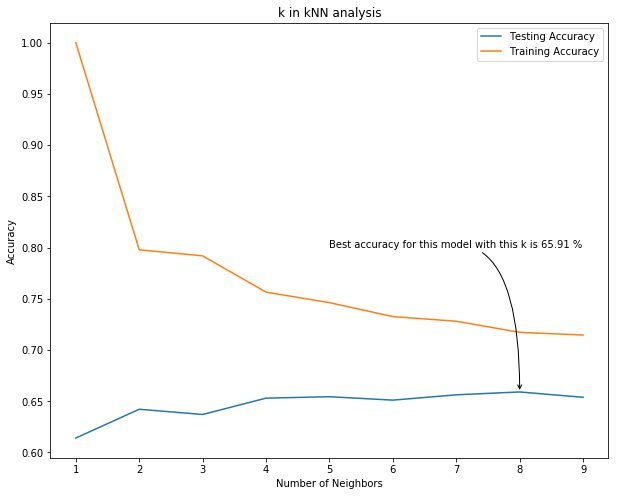

In [73]:
calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test)

In [75]:
kNN_algorithm(X_train , y_train , X_test , y_test , 8)

              precision    recall  f1-score   support

           1       0.76      0.92      0.83      4292
           2       0.61      0.73      0.67      2775
           3       0.42      0.26      0.32      2382
           4       0.57      0.35      0.43      1004
           5       0.92      0.49      0.64       335

   micro avg       0.66      0.66      0.66     10788
   macro avg       0.65      0.55      0.58     10788
weighted avg       0.63      0.66      0.63     10788

kNN algorithm acuracy is : 65.85 %


In [157]:
cf_matrix_knn = confusion_matrix(y_test, y_pred_kNN)

In [158]:
cf_matrix_knn = pd.DataFrame(cf_matrix_knn  , index = ['Ideal' ,'Premium','Very Good','Good','Fair'] , columns =['Ideal','Premium','Very Good','Good','Fair'])

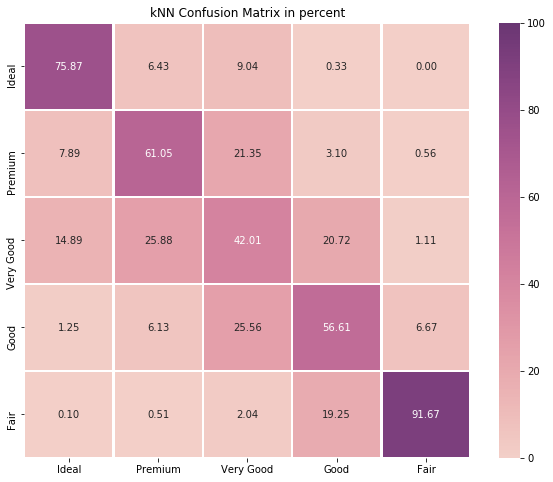

In [159]:
plot_confusion_matrix(cf_matrix_knn , y_test , 'kNN Confusion Matrix in percent' , '5x5')

# SVM (Support vector machine)

In [129]:
SVM_algorithm(X_train, X_test, y_train, y_test)

Accuracy: 75.27 %
              precision    recall  f1-score   support

           1       0.79      0.91      0.85      4292
           2       0.82      0.74      0.78      2775
           3       0.59      0.54      0.56      2382
           4       0.70      0.60      0.64      1004
           5       0.91      0.80      0.85       335

   micro avg       0.75      0.75      0.75     10788
   macro avg       0.76      0.72      0.74     10788
weighted avg       0.75      0.75      0.75     10788

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


In [160]:
cf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)

In [161]:
cf_matrix_SVM = pd.DataFrame(cf_matrix_SVM  , index = ['Ideal' ,'Premium','Very Good','Good','Fair'] , columns =['Ideal','Premium','Very Good','Good','Fair'])

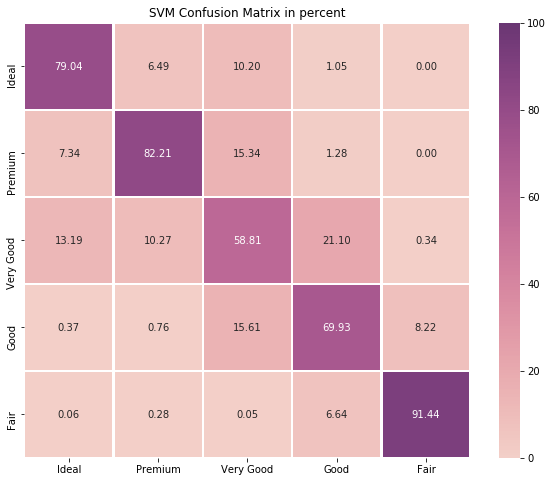

In [162]:
plot_confusion_matrix(cf_matrix_SVM , y_test , 'SVM Confusion Matrix in percent' , '5x5')

## Logistic Regression

In [163]:
LogisticRegression_algorithm(X_train, X_test, y_train, y_test)

Accuracy: 65.00 %
              precision    recall  f1-score   support

           1       0.70      0.92      0.79      4292
           2       0.66      0.70      0.68      2775
           3       0.49      0.40      0.44      2382
           4       0.38      0.01      0.02      1004
           5       0.85      0.42      0.56       335

   micro avg       0.65      0.65      0.65     10788
   macro avg       0.61      0.49      0.50     10788
weighted avg       0.62      0.65      0.61     10788



In [164]:
cf_matrix_LG = confusion_matrix(y_test, y_pred_LG)

In [165]:
cf_matrix_LG = pd.DataFrame(cf_matrix_LG  , index = ['Ideal' ,'Premium','Very Good','Good','Fair'] , columns =['Ideal','Premium','Very Good','Good','Fair'])

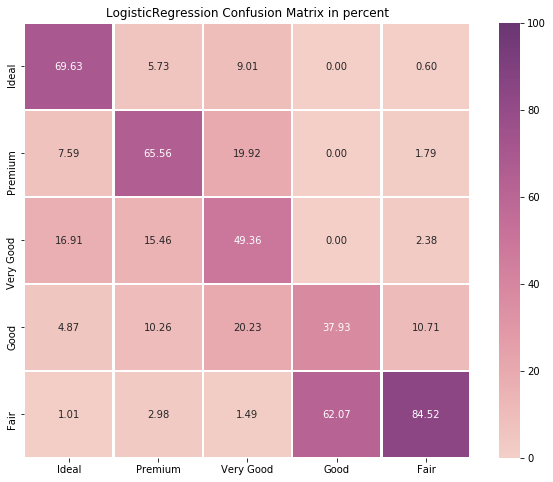

In [166]:
plot_confusion_matrix(cf_matrix_LG , y_test , 'LogisticRegression Confusion Matrix in percent' , '5x5')